# 분류
- 지도학습 유형(회귀, 분류) 중 하나.
- 학습 데이터의 피쳐와 레이블값을 머신러닝 알고리즘으로 학습해서 모델을 생성
- 생성된 모델에 새로운 데이터 값을 넣었을 때 미지의 레이블 값을 예측
- => 기존 데이터의 패턴을 알고리즘으로 인지한 뒤, 새롭게 관측된 데이터에 대한 레이블 판별
---
#### 여러 머신러닝 알고리즘들
- 베이즈 통계와 생성 모델에 기반한 나이브 베이즈
- 독립변수 - 종속변수 선형 관계성에 기반한 로지스틱 회귀
- 데이터 균일도에 따른 규칙 기반 결정 트리
- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(SVM)
- 근접 거리 기준의 최소 근접 알고리즘(Nearest Neighbor)
- 심층 연결 기반의 신경망(Neural Network)
- 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)
---
- 여기서는 앙상블을 위주로 다룰 것! 분류에서 가장 각광받는 방법 중 하나
- 이미지/영상/음성/NLP에서는 딥러닝이 좋은데, 이를 제외한 정형 데이터의 예측 분석에서는 앙상블이 좋다.
 - 앙상블은 Bagging, Boosting으로 나뉨
 - Random Forest : Bagging 방식의 대표,
 - 근래는 Boosting 방식으로 발전하고 있다.
  - Gradient Boosting : 예측 성능 뛰어나지만, 시간이 오래 걸림
  - XgBoost, LightGBM 등 예측 성능 높이면서 + 수행 시간도 줄인 알고리즘들
  
---
#### 학습목표
- 앙상블 개요
- 랜덤 포레스트
- Gradient Boosting 전통 기법
- XgBoost
- LightGBM
- Stacking
---
#### 앙상블에 사용되는 알고리즘
- 보통은 같은 알고리즘을 결합한다.
- 결정 트리 : 일반적으로 앙상블에 적용되는 알고리즘
 - 쉽고 유연함
 - 데이터 스케일링/정규화 등 사전 가공 영향 적음
 - 예측 성능 향상을 위해 복잡한 규칙 구조 -> 과적합 발생 많다.
 - 앙상블 기법에서는 이게 오히려 장점이라고 합니다..
---
- 앙상블은 매우 많은 여러 개의 약한 학습기를 결합해, 확률적 보완/오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시킨다.
- 결정 트리가 약한 학습기가 될 수 있음

## 2. 결정트리
- 직관적으로 이해하기 쉬운 알고리즘
- if/else 기반으로 스무고개 게임처럼, 분류 규칙을 만들고 데이터를 이 규칙에 따라 분류한다.
- 결정트리 그림
---
- 데이터 세트에 피쳐가 있고. 피쳐가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어진다.
- 많은 규칙이 있다는 건 분류 결정 방식이 복잡해진다는 것
- 과적합이 되기 쉽다. ==> 트리의 깊이(depth)가 깊어질수록 결정트리의 예측 성능이 저하될수 있음
---
- 가능한 한 적은 결정 노드로, 높은 예측 정확도를 가지려면 : 규칙을 적용할 때마다 잘 나눠줘야 한다.
- 어떻게 트리를 분할할 것인가가 중요. 규칙을 거쳐 나눠진 데이터 세트가 이전보다 더 균일해지도록 함
 - 균일 : 같은 것들이 많도록 하는 것. p186에서 데이터 세트 A, B, C 비교
- 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다?
 - 제일 나누기 쉬운 피쳐부터 시작한다. 고 생각하면 될 듯 ( 다시 확인해보기 )
- 균일도 측정 방법에는 1} 엔트로피를 이용한 정보 이득 지수 2} 지니 계수 두 가지가 있다.

---
- 결정 노드 : 규칙 조건을 만든다. = 규칙노드

### 2-1. 엔트로피 ( 정보 이득 지수)
- 엔트로피 : 주어진 데이터 집합의 혼잡도. 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮다.
- 정보 이득 지수 = 1 - 엔트로피
- 이 정보 이득 지수로 분할 기준을 정해서, 정보 이득이 높은 속성을 기준으로 분할한다.


### 2-2. 지니 계수
- 0이 가장 평등하고, 1로 갈수록 불평등하다. (경제학에서 불평등 지수 나타낼 때 사용함)
- 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석, 지니 계수가 낮은 속성을 기준으로 분할한다.
- 사이킷런 DTclassifier는 지니계수를 기본으로 이용한다.

### 2-3. 결정 트리 특징
- 장점 : 알고리즘이 쉽고 직관적이다. 어떤 규칙을 거쳐서 이 데이터가 이렇게 분류되었는지 직접 확인 가능
- 장점2 : 정보의 균일도만 신경쓰면 됨, 피처 스케일링/정규화 등이 필요 없다.
- 단점 : 과적합, 정확도 떨어짐. 데이터가 전부 완벽히 분류될 때까지 규칙을 만드니까

-> 트리의 크기를 사전에 제한하는 것이 더 좋다. (하이퍼 파라미터 튜닝)

---
- 사이킷런 결정 트리 알고리즘 : 분류, 회귀 알고리즘이 모두 있음. 이 중 분류만 다룬다

### 2-4. DecisionTree 알고리즘의 파라미터들
- min_samples_split
 - 노드 분리를 위한 최소한의 샘플 데이터 수. 과적합 제어에 사용
 - 작게 설정할수록 과적합 증가
 
---
- min_samples_leaf
 - 리프 노드에 있을 수 있는 최소한의 샘플 데이터 수
 - 마찬가지로 과적합 제어 용도.
 - 비대칭적 데이터의 경우, 특정 클래스 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정
 
---
- max_features
 - 최적의 분할을 위해 고려할 최대 피처 개수. 디폴트는 모든 피쳐 사용
 - int : 피처 개수, float : 대상 피처의 퍼센트 로 인식함
 - sqrt(=auto), log, None..

---
- max_depth
 - 트리의 최대 깊이 규정
 - None : 그냥 데이터 완벽히 분리될 때까지 끝까지 감
 - 적당히 조절해야 함

---
- max_leaf_nodes
 - 말단 노드(leaf)의 최대 개수

### 2-5. 붓꽃 데이터 - Decision Tree 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Decisiontree Classifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터 로딩, 학습/테스트 데이터 세트 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size = 0.2, random_state = 11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

#### Graphviz 읽어서 그래프로 시각화

In [2]:
from sklearn.tree import export_graphviz

# graphviz에 적용해서, out file(시각화 출력 파일) 만들어냄.
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names,
                feature_names = iris_data.feature_names, impurity = True, filled = True)

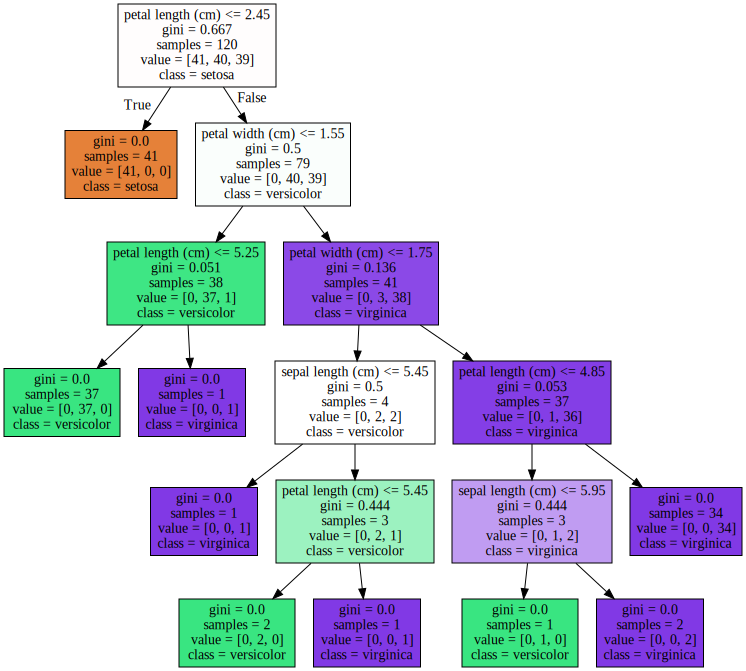

In [3]:
import graphviz

# tree.dot 파일을 Graphviz가 읽고 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

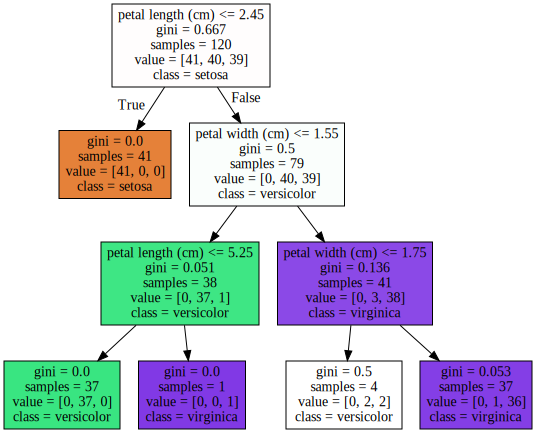

In [4]:
# max_depth 3으로

dt_clf = DecisionTreeClassifier(max_depth = 3, random_state = 156)
dt_clf.fit(X_train, y_train)
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names,
                feature_names = iris_data.feature_names, impurity = True, filled = True)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

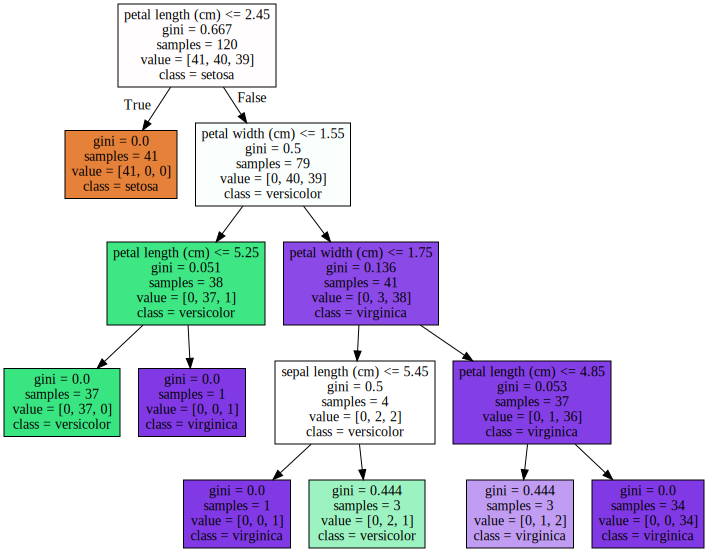

In [5]:
# min_sapmles_split 4으로

dt_clf = DecisionTreeClassifier(min_samples_split = 4, random_state = 156)
dt_clf.fit(X_train, y_train)
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names,
                feature_names = iris_data.feature_names, impurity = True, filled = True)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

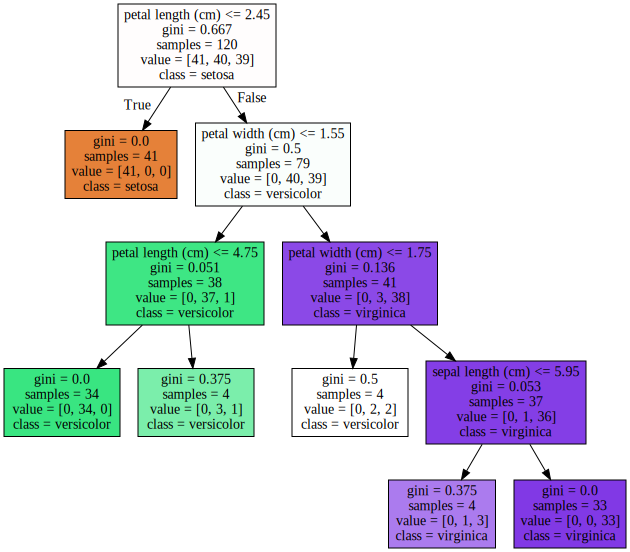

In [6]:
# min_sapmles_leaf 4으로
# Sample이 4 이상인 노드가 리프 노드가 될 수 있기 때문에, 결정트리의 규칙이 조금 바뀐다.
# ex. 원래는 1개 샘플의 리프노드를 만들 수 있었는데 그럴 수가 없어졌음

dt_clf = DecisionTreeClassifier(min_samples_leaf = 4, random_state = 156)
dt_clf.fit(X_train, y_train)
export_graphviz(dt_clf, out_file = 'tree.dot', class_names = iris_data.target_names,
                feature_names = iris_data.feature_names, impurity = True, filled = True)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### 결정트리는 균일도에 기반해 __어떤 속성__을 규칙 조건으로 선택하느냐가 중요하다.
#### 중요한 몇 개의 피쳐가 명확한 규칙 트리를 만드는 데 크게 기여
#### 모델을 좀 더 간결하고, 이상치에 강하도록 만들 수 있음
#### -> 각 피쳐가 얼마나 중요한지 지표가 feature_importances_ 속성으로

Feature importances:
[0.006 0.    0.546 0.448]
sepal length (cm) : 0.006
sepal width (cm) : 0.000
petal length (cm) : 0.546
petal width (cm) : 0.448


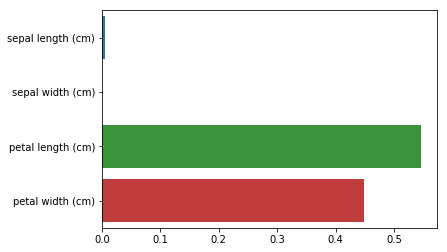

In [7]:
import seaborn as sns
import numpy as np
import pandas as pd

# feature importance
print("Feature importances:\n{}".format(np.round(dt_clf.feature_importances_, 3)))

# feature importance mapping
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{} : {:.3f}'.format(name, value))

# feature importance visualization
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

In [8]:
dt_clf.feature_importances_

array([0.00594727, 0.        , 0.5459484 , 0.44810433])

#### -> petal_length importance 제일큼
- 알고리즘이 쉬워서 쉽게 시각화가 가능하다. DT가

### 2-6. 결정 트리 과적합
- DT의 예측 방법과, 이로 인한 과적합 문제를 시각화 p200

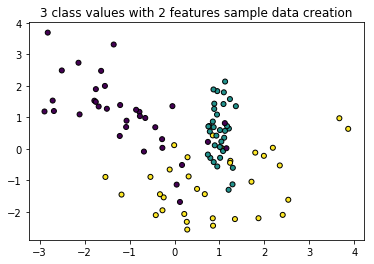

In [8]:
# 분류를 위한 테스트용 데이터 만드는 class -> make_classification()
# 2개 피쳐, 3개 클래스 가지는 데이터셋을 만들어 그래프로 시각화

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 class values with 2 features sample data creation')

# 피쳐 2개, 클래스 3개 유형의 분류 샘플 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 그리기. 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
# 시각화 함수는 그냥 책으로 보랍니다

### 2-6. 결정 트리 실습 - 사용자 행동 인식 데이터셋
- UCI 머신러닝 리포지토리 어쩌구에서 가져옵니다

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일 -> 피쳐 이름 index, 피처가 공백으로 분리되어있다......
feature_name_df = pd.read_csv('./human_activity/features.txt', sep = '\s+',
                              header=None, names=['column_index', 'column_name'])

# 피처명 index 제거, 피쳐 명만 리스트객체로 생성
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

feature_name_df

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
5,6,tBodyAcc-std()-Z
6,7,tBodyAcc-mad()-X
7,8,tBodyAcc-mad()-Y
8,9,tBodyAcc-mad()-Z
9,10,tBodyAcc-max()-X


In [14]:
# 중복 피쳐명 제거하기
# 이건그냥 전처리 과정, 깊이들어가지 말기

# 중복피쳐가 뭐가 있는지 일단확인
# column_name의 값 기준으로 묶어준다.
feature_dup_df = feature_name_df.groupby('column_name').count()

# 묶어준 것 중에 count된 개수가 2개 이상인 거 골라냄
print(feature_dup_df[feature_dup_df['column_index']>1].count())

feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


- 총 42개 피쳐 중복, 원본 피처명에 _1 or _2 추가하는 함수

In [15]:
# 뭔 소 린 지 모르겠 음
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df,
                                   how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                    'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                    if x[1] > 0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
    return new_feature_name_df

In [17]:
# train, test dataframe 생성하기.

import pandas as pd

def get_human_dataset():
    
    # 공백 구분 파일 이니까 로드할때 다르게 해야함
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+',
                                  header=None, names=['column_index', 'column_name'])
    
    # 중복 피쳐 수정하는 get_new_feature_name_df() 이용
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DAtaFrmae에 피처명을 칼럼으로 부여하기 위해 리스트로 변환
    feature_name= new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습데이터, 테스트데이터 로딩
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    # 레이블 데이터 학습..테스트..dF 칼럼 action
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', header=None,
                          names = ['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', header=None, 
                         names = ['action'])
    
    # 학습/테스트용 데이터프레임 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [27]:
print(X_train.info())
print(y_train['action'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [19]:
# 1. 하이퍼 파라미터 모두 디폴트값

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도:{:.4f}'.format(accuracy))

# DecisionTreeClassifier 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 파라미터 : \n', dt_clf.get_params())

결정 트리 예측 정확도:0.8548
DecisionTreeClassifier 기본 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [20]:
# 2. 하이퍼 파라미터에서 Tree depth 조절
# GridSearchCV이용해서 max_depth값 변화시키며 예측 성능 확인

from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6, 8, 10, 12, 16, 20, 24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('최고 평균 정확도 : {:.4f}'.format(grid_cv.best_score_))
print('최적 하이퍼 파라미터 :', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
최고 평균 정확도 : 0.8513
최적 하이퍼 파라미터 : {'max_depth': 16}


In [21]:
# cv_results_ 속성을 DF로
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max depth 파라미터와 그때 테스트세트, 학습데이터세트 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


별도 테스트 데이터 세트에서 max_depth 변화에 따른 값 측정

In [22]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state = 156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {} 정확도 : {:.4f}'.format(depth, accuracy))

max_depth = 6 정확도 : 0.8558
max_depth = 8 정확도 : 0.8707
max_depth = 10 정확도 : 0.8673
max_depth = 12 정확도 : 0.8646
max_depth = 16 정확도 : 0.8575
max_depth = 20 정확도 : 0.8548
max_depth = 24 정확도 : 0.8548


In [29]:
# 3. max_depth, min_samples_split 같이 변경하면서 튜닝
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('최고 평균 정확도 : {:.4f}'.format(grid_cv.best_score_))
print('최적 하이퍼 파라미터 :', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
최고 평균 정확도 : 0.8549
최적 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_split': 16}


In [30]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('최적하이퍼파라미터 결정트리 예측정확도 :{:.4f}'.format(accuracy))

최적하이퍼파라미터 결정트리 예측정확도 :0.8717


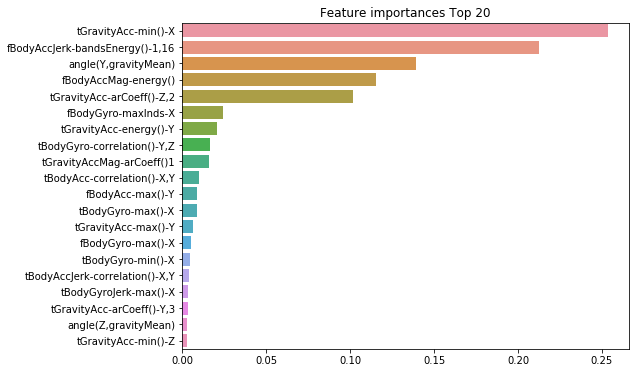

In [31]:
# 결정트리에서 각 피쳐 중요도 확인하기

import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Series 변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize = (8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 3. 앙상블
- 여러 개의 분류기의 예측을 결합해 보다 정확한 최종 예측 도출
- 정형 데이터 분류 시에는 앙상블이 뛰어난 성능을 낸다.
- Random Forest , Gradient Boosting -> Boosting 계열의 앙상블이 더 인기가 많아졌다.
- XGboost, LightGBM, Stacking 등... XGboost랑 LightGBM 등 최신 앙상블 모델 알고만 있어도 예측 성능이 뛰어난 모델을 만들 수 있다.

---
- Voting, Bagging, Boosting의 세 가지 유형으로 나눌 수 있다. (+ Stacking..)
- Voting, Bagging : 여러 개 분류기가 투표를 통해 최종 결과 결정
- Voting은 서로 다른 알고리즘, Bagging은 같은 알고리즘에 데이터 샘플을 다르게 함
---
- Voting은 같은 원본 학습 데이터를 각 분류기가 학습하고 투표
- Bagging에서는 원본 학습 데이터가 샘플링 되어 각 분류기에 전달된다.
- -> Bootstrapping 분할 방식.
 - 샘플링 데이터 세트에 대해 각 분류기가 예측 수행한 뒤, 보팅을 통해 최종 예측 결과를 선정
 - 배깅은 중첩을 허용한다 (!= 교차검증)
 
---
- Boosting은 여러 개 분류기가 순차적으로 학습을 수행하면서, 앞의 분류기에서 발생한 예측오류에 대해 다음 분류기에 가중치를 부여하면서 학습/예측을 진행하는 것

### 3-1. Voting - Hard voting, Soft voting
- 하드 보팅 : 다수결
- 소프트 보팅 : 확률의 평균
- Voting 방식 앙상블 - Voting Classifier 클래스

In [32]:
# 위스콘신 유방암 데이터 예측 분석
# 로지스틱 회귀, kNN 기반

# 데이터 임포트 하는것부터..
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [33]:
# 소프트 보팅 방법으로 보팅 분류기 만들기.

# 개별 모델 : LR, kNN
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 8)

# 개별 모델 -> 소프트 보팅 기반 앙상블
vo_clf = VotingClassifier( estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')
# estimators 인자에 분류 모델과 모델 객체를 묶은 tuple들의 list를 인자로.

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size = 0.2, random_state = 156)

# Votingclassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print("Voting 분류기 정확도 : {:.4f}".format(accuracy_score(y_test, pred)))

# 개별 모델 학습/에측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__  # 여기 클래스 이름이 저장돼 있나봅니다..
    print('{} 정확도 : {:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도 : 0.9474
LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9386


C:\Users\frank\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\frank\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

#### 보통 Voting이 단일 모델보다 뛰어난 예측 성능을 가지는 경우가 많다.
#### 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가? 이게 ML모델 평가 요소에서 중요함.
-> 편향-분산 트레이드오프 : ML모델이 극복해야 할 과제

## 4. 랜덤 포레스트
- bagging. 같은 알고리즘으로 여러 개 분류기
- 빠른 수행 속도, 높은 예측 성능
- 결정 트리 : 직관적이라는 장점을 그대로 가진다. (Boosting도 다 결정트리라고 함)
- 전체 데이터에서 데이터를 샘플링해서, 개별 학습 수행한 뒤 최종적으로 Voting을 통해 예측 결정.
---
- 샘플링 방법 : Bootstrapping
- 여러 개의 데이터 세트를 중첩되게 분리 (Bootstrap + aggregating = Bagging이라고 하네요)
- Subset 데이터 건수는 전체 데이터 건수와 동일, 하지만 중복 가능하게 샘플링된다. p218

- RandomForestClassifier 클래스 사용

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도 :{:.4f}'.format(accuracy))

랜덤 포레스트 정확도 :0.9253


### 4-1. 하이퍼 파라미터 튜닝
- n_estimators : RF에서 결정트리 개수. 많을수록 좋은 성능, 그러나 수행시간 길어짐
- max_features : 트리 분할을 위해 사용하는 피처 개수 (default : sqrt)
- max_depth, min_samples_leaf 등등은 결정트리와 똑같다.
- GridSearchCV 이용해 하이퍼 파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}
# RFC 생성, Gridsearch수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적하이퍼파라미터 :', grid_cv.best_params_)
print('최고예측정확도 :{:.4f}'.format(grid_cv.best_score_))

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators = 300, max_depth=10, min_samples_leaf=8,
                                min_samples_split = 8, random_state = 0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도:{:.4f}'.format(accuracy_score(y_test, pred)))

In [ ]:
# 중요 피쳐 확인
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize = (8, 6))
plt.title('Feature importances Top20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 5. GBMMMMMMMMMMMMM
- 부스팅 알고리즘 ::: 약한 학습기 순차적으로, 오류에 가중치 부여해서 더 강해짐
- 부스팅 구현 두개 : AdaBoost(Adaptive boosting), 그래디언트 부스트. 
---
### 5-1. AdaBoost
1. 첫 분류기가 학습하고 오류 데이터 확인
2. 오류 데이터에 가중치값을 부여해서 두번째 학습기가 더 잘 분류하도록 함
3. 두번째 학습기가 다른 기준(분류기준2)로 분류
4. 잘못분류된 오류데이터를 가중치 부여해서 세번째 분류기가 더 잘 분류하도록 함
5. 세번째 학습기가 또 다른기준(분류기준3)으로 분류
6. 계속함.... 결과적으로 예측정확도 높아짐
---
### 5-2. GBM
- Adaboost와 유사한데. 가중치 업데이트가 경사 하강법을 이용해서 됨

- 오류값 = 실제값 - 예측값
- 이 오류를 최소화하는 방향으로 가중치를 계속 업데이트
- 경사하강법은 회귀에서 배워보세요~

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행시간 측정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM accuracy :{:.4f}'.format(gb_accuracy))
print('GBM time : {:.1f}sec'.format(time.time()-start_time))

### 5-3. GBM 파라미터 튜닝
- loss : 경사 하강법에서 사용할 비용함수 지정 (디폴트 : deviance)
- learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률. 기본값 0.1
 - 너무 작아도 안되고, 너무 커도 안돼
 - n_estimators 파라미터와 상호보완적으로 조합해 사용
 - learning_rate를 작게 하고 n_estimators를 크게 하면 한계점까지는 예측 성능이 좋아질순 있다
 - 근데 너무 오래 걸린다, 시간들인만큼 정확도 커지지도않음
- n_estimators : 약한 학습기의 개수
- subsample : 데이터 샘플링 비율. 기본값 1(전체 학습 데이터를 기반으로 한다는 것), 0.5면 50%.
 - 과적합 방지하려면 1보다 작은 값으로 설정

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 500],
    'learning_rate' : [0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid = params, cv = 2, verbose = 1)
grid_cv.fit(X_train, y_train)
print('best hyper parameter : ', grid_cv.best_params_)
print('best accuracy : {:.4f}'.format(grid_cv.best_score_))

In [ ]:
# 최적 파라미터 estimator로 예측
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM accuracy :{:.4f}'.format(gb_accuracy))

## 6. XGBoost(엑스트라 그래디언트 부스트)
- GBM 기반
- 분류, 회귀에서 뛰어난 예측 성능
- 병렬 CPU환경에서 병렬 학습 가능 : 기존 GBM보다 학습 빠르다(일반 GBM은 순차적으로 가중치 증감)
- 과적합 규제, 과적합에 더 강한 내구성
- Tree pruning : 긍정 이득 없는 분할 가지치기
#### 긍정 이득, 부정 이득 : 아직모름..

- 자체 내장된 교차검증, 평가값이 최적화되면 중간에 기능을 멈출 수도 있음(조기 중단, 효율적)
- 결손값을 자체적으로 처리

In [3]:
# 설치 확인
import xgboost as xgb
from xgboost import XGBClassifier

# 사이킷런 래퍼 xgboost : XGBClassifier, XGBRegressor를 지원
# 파이썬 래퍼 xgboost : 그냥 import xgboost 하는 듯

#### 파라미터 :
- 파이썬 래퍼 모듈과 사이킷런 래퍼 모듈에서의 파라미터 이름이 약간 다르다
- 동일한 파라미터이지만, 사이킷런 래퍼 모듈의 경우 사이킷런의 파라미터 이름 규칙에 따라 만들어진 거
- 일반 파라미터:스레드 개수, silent 모드 등 선택, 디폴트를 바꾸는 일은 거의 없다
- 부스터 파라미터:트리 최적화, 부스팅, regularization(정규화?)
- 학습 태스크 파라미터:학습 수행시 객체 함수, 평가 지표 설정

#### 과적합 문제가 발생한다면
- eta 낮추기(0.01~0.1)
- max_depth 낮추기
- min_child_weight 높이기(weight가 작으면, 나누는게 별로 안중요한거니까 라고 생각)
- gamma 높이기
- subsample, colsample_bytree 조정

#### 조기 중단 :
- 조기 중단 파라미터 값이 50이면, n_estimators를 지나면서 부스팅을 반복하다가 50회를 반복해도 학습 오류가 감소하지 않으면 조기 중단함.

In [4]:
import xgboost
print(xgboost.__version__)

0.90


In [5]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target
cancer_df = pd.DataFrame(X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [6]:
print(dataset.target_names)
print(cancer_df.target.value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [7]:
# 80% 학습용, 20% 테스트용
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2,
                                                    random_state = 156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


#### 파이썬 래퍼 XGBoost에서
- 학습용, 테스트용 데이터셋을 위해 별도의 객체인 DMatrix생성
- 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost의 전용 데이터 세트
- DMatrix 입력 파라미터 : data, label. data : 피처 데이터 세트, label : 레이블 데이터(종속값)세트
- libsvm txt 포맷 파일, xgboost 이진 버퍼 파일을 파라미터로 입력받아 변환가능.........

In [8]:
# 이게 뭘하는거죠?
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

- xgboost를 이용해 학습을 수행하기 전에, 하이퍼 파라미터 설정(딕셔너리 형태로)

In [9]:
params = {
    'max_depth':3,
    'eta':0.1,
    'objective':'binary:logistic',
    'eval_metric':'logloss',
    'early_stoppings':100
}
num_rounds = 400

In [10]:
# train 세트를 'train', test 세트를 'eval'로 명기
wlist = [(dtrain, 'train'), (dtest, 'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train()함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds,
                     early_stopping_rounds=100, evals=wlist)

[0]	train-logloss:0.609688	eval-logloss:0.61352
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.540803	eval-logloss:0.547842
[2]	train-logloss:0.483753	eval-logloss:0.494247
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.39055	eval-logloss:0.409109
[5]	train-logloss:0.354145	eval-logloss:0.374977
[6]	train-logloss:0.321222	eval-logloss:0.345714
[7]	train-logloss:0.292592	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207937	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.22005
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logl

[161]	train-logloss:0.007261	eval-logloss:0.088013
[162]	train-logloss:0.007241	eval-logloss:0.087758
[163]	train-logloss:0.007221	eval-logloss:0.087784
[164]	train-logloss:0.0072	eval-logloss:0.087777
[165]	train-logloss:0.00718	eval-logloss:0.087516
[166]	train-logloss:0.007161	eval-logloss:0.087542
[167]	train-logloss:0.007142	eval-logloss:0.087642
[168]	train-logloss:0.007122	eval-logloss:0.08739
[169]	train-logloss:0.007103	eval-logloss:0.087377
[170]	train-logloss:0.007084	eval-logloss:0.087298
[171]	train-logloss:0.007065	eval-logloss:0.087368
[172]	train-logloss:0.007047	eval-logloss:0.087395
[173]	train-logloss:0.007028	eval-logloss:0.087385
[174]	train-logloss:0.007009	eval-logloss:0.087132
[175]	train-logloss:0.006991	eval-logloss:0.087159
[176]	train-logloss:0.006973	eval-logloss:0.086955
[177]	train-logloss:0.006955	eval-logloss:0.087053
[178]	train-logloss:0.006937	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.086973
[180]	train-logloss:0.006901	eval-log

In [11]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시')
print(np.round(pred_probs[:10], 3))

preds = [ 1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개 표시', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개 표시 [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [13]:
import import_ipynb
from Week3_Evaluation import get_clf_eval

In [14]:
get_clf_eval(y_test, preds, pred_probs)

오차행렬
[[35  2]
 [ 1 76]]
정확도:0.9737, 정밀도:0.9744, 재현율:0.9870, F1:0.9806, AUC:0.9951


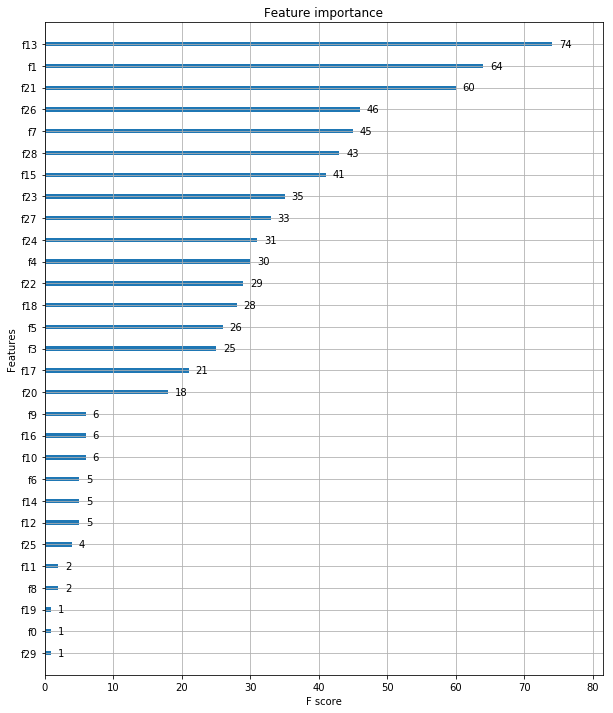

In [16]:
# xgboost 패키지 내장 시각화 기능
# 피쳐의 중요도를 막대그래프로 나타냄
# f1 스코어 기반으로.
# 사이킷런은 feature_importances_속성으로 직접 만들어야, xgboost는 알아서 해준다.
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10,12))
# 학습이 완료된 모델 객체(xgb_model)와 맷플롯립의 ax객체 입력
plot_importance(xgb_model, ax=ax)

### 사이킷런 래퍼 XGBoost

In [17]:
# XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, w_preds, w_pred_proba)

오차행렬
[[35  2]
 [ 1 76]]
정확도:0.9737, 정밀도:0.9744, 재현율:0.9870, F1:0.9806, AUC:0.9951


In [18]:
# 조기 중단 수행(early_stopping_rounds, eval_metric, eval_set 파라미터 설정)
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss',
               eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

[230]	validation_0-logloss:0.086002
[231]	validation_0-logloss:0.085922
[232]	validation_0-logloss:0.086102
[233]	validation_0-logloss:0.086115
[234]	validation_0-logloss:0.086169
[235]	validation_0-logloss:0.086263
[236]	validation_0-logloss:0.086292
[237]	validation_0-logloss:0.086217
[238]	validation_0-logloss:0.086395
[239]	validation_0-logloss:0.086342
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.086195
[242]	validation_0-logloss:0.086248
[243]	validation_0-logloss:0.086263
[244]	validation_0-logloss:0.086293
[245]	validation_0-logloss:0.086222
[246]	validation_0-logloss:0.086398
[247]	validation_0-logloss:0.086347
[248]	validation_0-logloss:0.086276
[249]	validation_0-logloss:0.086448
[250]	validation_0-logloss:0.086294
[251]	validation_0-logloss:0.086312
[252]	validation_0-logloss:0.086364
[253]	validation_0-logloss:0.086394
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.086441
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08

211번째부터 311번째까지 성능 평가 지수가 0.085593에서 더 향상되지 않았기 때문에 조기 중단한다.


학습된 XGBClassifier의 예측 성능:

In [19]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차행렬
[[34  3]
 [ 1 76]]
정확도:0.9649, 정밀도:0.9620, 재현율:0.9870, F1:0.9744, AUC:0.9954


약간 저조한 성능이지만 큰 차이가 없다.


그러나 조기 중단값을 너무 급격하게 줄이면, 예측 성능이 저하될 우려가 크다. ex. early_stopping_rounds = 10으로 하면 성능을 올릴 여지가 있는데도 무시해 버림

In [20]:
# early_stopping_rounds = 10
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='logloss',
               eval_set = evals, verbose = True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


62번까지만 반복, 정확도가 0.9561로, 100번 했을 때의 0.9649 보다 낮다.

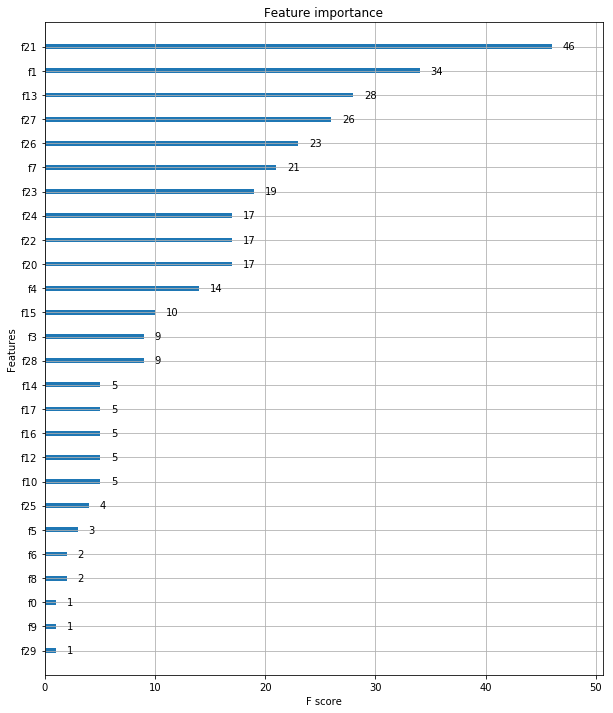

In [21]:
# 앞에서 썼던 plot_importance() API를 사이킷런 래퍼 XGB로도 사용할 수 있다.
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10, 12))
# 사이킷런 wrapper 클래스 대입
plot_importance(xgb_wrapper, ax=ax)

## 7. LightGBM
- XGBoost는 학습 시간이 오래 걸림
- LightGBM의 장점 :
 - 빠른 학습, 예측 수행시간
 - 작은 메모리 사용량
 - 카테고리형 피쳐 자동 변환 및 최적 분할(원-핫 인코딩 등 필요 없음)
- 성능도 Xgboost와 비교했을 때 비슷하다.
- 10000건 이하의 데이터 세트에는 과적합 발생 가능성 높음
---
### XGBoost  VS  LightGBM
- Xgboost
 - 균형 트리 분할 방식
 - 트리 깊이가 최소화된다.
 - 과적합에 강한 구조, 그러나 균형을 맞추기 위한 시간이 많이 필요
- LightGBM
 - 리프 중심 트리 분할 방식
 - 최대 손실값을 가지는 리프 노드를 지속적으로 분할, 깊고 비대칭적인 트리 생성
 - 학습을 반복할수록 결과적으로 균형 트리 분할보다 낫다는 게 LightGBM 개발자들의 생각이었다고함
---
- 파이썬 패키지명 : lightgbm
- 사이킷런과의 호환성 유지를 위해 사이킷런 래퍼 lightgbm이 개발되었다.
- LGBMClassifier, LGBMRegressor

### LGBM 주요 파라미터
__Xgboost와 비슷하나, xgboost와 다르게 트리 깊이가 매우 깊어지니 그에 맞는 파라미터 설정 필요__


- num_iterations(100) : 반복 수행하려는 트리 개수, 사이킷런 래퍼클래스에선 n_estimators
- learning_rate(0.1) : 학습률. n_estimators 크게, learning_rate 작게 하면 성능 향상 but 과적합 & 시간소요
- max_depth(-1) : 트리 깊이, 0보다 작은 값이면 깊이에 제한 없음
- min_data_in_leaf(20) : 결정 트리의 min_samples_leaf, 사이킷런에선 min_child_samples. 과적합 제어
- num_leaves(31) : 하나의 트리가 가질 수 있는 최대 리프 개수
- boosting(gbdt) : 부스팅 트리를 생성하는 알고리즘
 - gbdt : 일반 그래디언트 부스팅 결정트리
 - rf : 랜덤 포레스트
- bagging_fraction(1.0) : 트리 학습마다 무작위로 선택하는 피쳐 비율
- lambda_l2(0.0) : L2 regulation 제어를 위한 값, 피처 개수가 많으면 적용, 클수록 과적합 감소, 사이킷런에서는 reg_lambda
- lambda_l1(0.0) : L1 regulation 제어를 위한 값, 마찬가지로 과적합 제어, 사이킷런에서는 reg_alpha
---
#### learning task 파라미터
- objective : 최솟값을 가져야 할 손실함수 
---
### 하이퍼 파라미터 튜닝 방안
__num_leaves 개수를 중심으로, min_child_samples, max_depth를 함께 조정하며 모델 복잡도를 줄임__
- num_leaves : 개별 트리가 가질 수 있는 최대 리프개수. 높이면 정확도가 높아지지만 과적합 발생
- min_data_in_leaf(min_child_samples) : 큰값이면 과적합 방지
- max_depth : 깊이의 크기 제한.


그 외, learning_rate 작게 하면서 n_estimators를 크게 하는 것 (너무 극단적이면 마찬가지로 과적합발생)
reg_lambda, reg_alpha,.... 등 등 등

---
p250 파라미터 비교!!

In [24]:
# LightGBM 사이킷런 래퍼  클래스 사용
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 80% 학습용, 20% 테스트용
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2,
                                                   random_state=156)
# n_estimators 는 앞과 동일하게 400
lgbm_wrapper = LGBMClassifier(n_estimators = 400)

# 조기 중단 수행
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric='logloss',
                 eval_set=evals, verbose = True)
preds= lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865
[14]	valid_0's binary_logloss: 0.215076
[15]	valid_0's binary_logloss: 0.205996
[16]	valid_0's binary_logloss: 0.196091
[17]	valid_0's binary_logloss: 0.186395
[18]	valid_0's binary_logloss: 0.17942
[19]	valid_0's binary_logloss: 0.174727
[20]	valid_0's binary_logloss: 0.168563
[21]	valid_0's binary_logloss: 0.165432
[22]	valid_0's binary_logloss: 0.160356
[23]	valid_0's binary_logloss: 0.155508
[24]	valid_0's binary_logloss: 

In [25]:
get_clf_eval(y_test, preds, pred_proba)

오차행렬
[[33  4]
 [ 2 75]]
정확도:0.9474, 정밀도:0.9494, 재현율:0.9740, F1:0.9615, AUC:0.9926


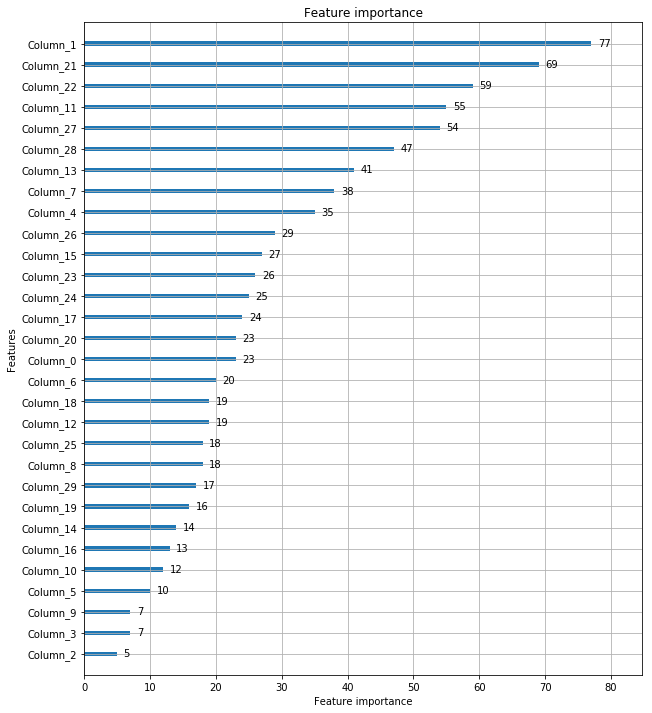

In [26]:
# 피쳐 중요도 시각화 API : plot_imporance() (xgboost랑 똑같다!!)
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(lgbm_wrapper, ax=ax)

## 8. 캐글 산탄데르 고객 만족 예측

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("santander-customer-satisfaction/train_santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [6]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율:{:.3f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율:0.040


In [7]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [8]:
# -999999 : NaN값일 것, 가장 빈도수가 많은 2로 변환
cust_df['var3'].replace(-999999, 2, inplace = True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리. 레이블 칼럼은 맨 마지막이므로 -1의 index
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피쳐데이터 shape:{0}'.format(X_features.shape))

피쳐데이터 shape:(76020, 369)


In [9]:
#학습, 테스트 데이터셋 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2,
                                                   random_state = 0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습세트 : {}, 테스트 세트 : {}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블값 분포비율')
print(y_train.value_counts()/train_cnt)
print('\n테스트 세트 레이블값 분포비율')
print(y_test.value_counts()/test_cnt)


학습세트 : (60816, 369), 테스트 세트 : (15204, 369)
학습 세트 레이블값 분포비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

테스트 세트 레이블값 분포비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


### XGBoost 학습, 파라미터 튜닝

In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimator : 500
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표는 auc, 조기 중단 100
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
            eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC:{:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

In [11]:
# XGBoost 하이퍼 파라미터 튜닝 : 칼럼 수가 많으므로 과적합 가능성을 가정.
# max_depth, min_child_weight, colsample_bytree 하이퍼 파라미터만 튜닝 대상으로
# 학습 시간이 많이 필요한 파라미터의 경우, 먼저 2~3개 정도 튜닝, 그 다음에 최적의 파라미터를 기반으로
# 다시 1~2개 파라미터 튜닝

# 8개의 하이퍼 파라미터

from sklearn.model_selection import GridSearchCV

# n_estimators 100으로 감소
xgb_clf= XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7], 'min_child_weight':[1, 3], 'colsample_bytree':[0.5, 0.75]}

# cv : 3 지정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적파라미터:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC:{:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.715421	validation_1-auc:0.722463
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.802772	validation_1-auc:0.807648
[2]	validation_0-auc:0.800147	validation_1-auc:0.804566
[3]	validation_0-auc:0.805692	validation_1-auc:0.809325
[4]	validation_0-auc:0.814807	validation_1-auc:0.816951
[5]	validation_0-auc:0.810346	validation_1-auc:0.812634
[6]	validation_0-auc:0.810623	validation_1-auc:0.814491
[7]	validation_0-auc:0.818556	validation_1-auc:0.820561
[8]	validation_0-auc:0.822006	validation_1-auc:0.823553
[9]	validation_0-auc:0.820433	validation_1-auc:0.821292
[10]	validation_0-auc:0.826212	validation_1-auc:0.825279
[11]	validation_0-auc:0.830077	validation_1-auc:0.827817
[12]	validation_0-auc:0.832328	validation_1-auc:0.828775
[13]	validation_0-auc:0.832008	validation_1-auc:0.827865
[14]	validation_0-auc:0.830319	validation_1-auc:0.82674

[51]	validation_0-auc:0.86387	validation_1-auc:0.843007
[52]	validation_0-auc:0.864428	validation_1-auc:0.843608
[53]	validation_0-auc:0.86492	validation_1-auc:0.843887
[54]	validation_0-auc:0.865341	validation_1-auc:0.844128
[55]	validation_0-auc:0.865713	validation_1-auc:0.843955
[56]	validation_0-auc:0.866165	validation_1-auc:0.844301
[57]	validation_0-auc:0.866538	validation_1-auc:0.84439
[58]	validation_0-auc:0.86671	validation_1-auc:0.844055
[59]	validation_0-auc:0.866977	validation_1-auc:0.843974
[60]	validation_0-auc:0.867483	validation_1-auc:0.8439
[61]	validation_0-auc:0.867853	validation_1-auc:0.843561
[62]	validation_0-auc:0.86811	validation_1-auc:0.843594
[63]	validation_0-auc:0.868319	validation_1-auc:0.843498
[64]	validation_0-auc:0.868554	validation_1-auc:0.843615
[65]	validation_0-auc:0.869021	validation_1-auc:0.843756
[66]	validation_0-auc:0.869095	validation_1-auc:0.843781
[67]	validation_0-auc:0.869277	validation_1-auc:0.843635
[68]	validation_0-auc:0.869639	validat

[1]	validation_0-auc:0.804027	validation_1-auc:0.809028
[2]	validation_0-auc:0.796929	validation_1-auc:0.805684
[3]	validation_0-auc:0.80379	validation_1-auc:0.811591
[4]	validation_0-auc:0.811904	validation_1-auc:0.818375
[5]	validation_0-auc:0.808826	validation_1-auc:0.815714
[6]	validation_0-auc:0.809236	validation_1-auc:0.816054
[7]	validation_0-auc:0.818354	validation_1-auc:0.823376
[8]	validation_0-auc:0.822085	validation_1-auc:0.826164
[9]	validation_0-auc:0.82165	validation_1-auc:0.824633
[10]	validation_0-auc:0.825876	validation_1-auc:0.828152
[11]	validation_0-auc:0.830307	validation_1-auc:0.830536
[12]	validation_0-auc:0.832494	validation_1-auc:0.831414
[13]	validation_0-auc:0.832283	validation_1-auc:0.831058
[14]	validation_0-auc:0.830152	validation_1-auc:0.829388
[15]	validation_0-auc:0.833723	validation_1-auc:0.831545
[16]	validation_0-auc:0.835902	validation_1-auc:0.833087
[17]	validation_0-auc:0.838024	validation_1-auc:0.835309
[18]	validation_0-auc:0.840344	validation_

[57]	validation_0-auc:0.863066	validation_1-auc:0.845717
[58]	validation_0-auc:0.863413	validation_1-auc:0.845678
[59]	validation_0-auc:0.863608	validation_1-auc:0.84581
[60]	validation_0-auc:0.86412	validation_1-auc:0.845891
[61]	validation_0-auc:0.864399	validation_1-auc:0.845775
[62]	validation_0-auc:0.864521	validation_1-auc:0.845851
[63]	validation_0-auc:0.864786	validation_1-auc:0.845721
[64]	validation_0-auc:0.865062	validation_1-auc:0.845821
[65]	validation_0-auc:0.865567	validation_1-auc:0.845831
[66]	validation_0-auc:0.865616	validation_1-auc:0.845926
[67]	validation_0-auc:0.865942	validation_1-auc:0.845591
[68]	validation_0-auc:0.866071	validation_1-auc:0.845562
[69]	validation_0-auc:0.866158	validation_1-auc:0.845375
[70]	validation_0-auc:0.866421	validation_1-auc:0.845291
[71]	validation_0-auc:0.866631	validation_1-auc:0.845063
[72]	validation_0-auc:0.866834	validation_1-auc:0.844927
[73]	validation_0-auc:0.867035	validation_1-auc:0.844978
[74]	validation_0-auc:0.867128	va

Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.809965	validation_1-auc:0.808886
[2]	validation_0-auc:0.804423	validation_1-auc:0.807373
[3]	validation_0-auc:0.815189	validation_1-auc:0.816603
[4]	validation_0-auc:0.824234	validation_1-auc:0.823278
[5]	validation_0-auc:0.819568	validation_1-auc:0.81934
[6]	validation_0-auc:0.819199	validation_1-auc:0.818772
[7]	validation_0-auc:0.827364	validation_1-auc:0.826183
[8]	validation_0-auc:0.831947	validation_1-auc:0.829293
[9]	validation_0-auc:0.832248	validation_1-auc:0.827116
[10]	validation_0-auc:0.836511	validation_1-auc:0.829685
[11]	validation_0-auc:0.841032	validation_1-auc:0.831312
[12]	validation_0-auc:0.843673	validation_1-auc:0.831989
[13]	validation_0-auc:0.843697	validation_1-auc:0.832132
[14]	validation_0-auc:0.843356	validation_1-auc:0.830392
[15]	validation_0-auc:0.846759	validation_1-auc:0.83237

[77]	validation_0-auc:0.892957	validation_1-auc:0.844356
[78]	validation_0-auc:0.893228	validation_1-auc:0.84433
[79]	validation_0-auc:0.893375	validation_1-auc:0.844108
[80]	validation_0-auc:0.893476	validation_1-auc:0.844037
[81]	validation_0-auc:0.893656	validation_1-auc:0.844067
[82]	validation_0-auc:0.893838	validation_1-auc:0.843845
[83]	validation_0-auc:0.894993	validation_1-auc:0.84388
[84]	validation_0-auc:0.895174	validation_1-auc:0.843781
[85]	validation_0-auc:0.895171	validation_1-auc:0.844018
[86]	validation_0-auc:0.895293	validation_1-auc:0.843721
[87]	validation_0-auc:0.895377	validation_1-auc:0.843689
[88]	validation_0-auc:0.895614	validation_1-auc:0.8435
[89]	validation_0-auc:0.895597	validation_1-auc:0.84341
[90]	validation_0-auc:0.896023	validation_1-auc:0.843738
[91]	validation_0-auc:0.896194	validation_1-auc:0.843675
[92]	validation_0-auc:0.896304	validation_1-auc:0.843666
[93]	validation_0-auc:0.896388	validation_1-auc:0.8436
[94]	validation_0-auc:0.89645	validati

[17]	validation_0-auc:0.85058	validation_1-auc:0.835537
[18]	validation_0-auc:0.852488	validation_1-auc:0.836913
[19]	validation_0-auc:0.851413	validation_1-auc:0.83678
[20]	validation_0-auc:0.853824	validation_1-auc:0.837786
[21]	validation_0-auc:0.853711	validation_1-auc:0.836986
[22]	validation_0-auc:0.852989	validation_1-auc:0.835059
[23]	validation_0-auc:0.855112	validation_1-auc:0.836803
[24]	validation_0-auc:0.856859	validation_1-auc:0.838802
[25]	validation_0-auc:0.85723	validation_1-auc:0.83782
[26]	validation_0-auc:0.857535	validation_1-auc:0.836375
[27]	validation_0-auc:0.85929	validation_1-auc:0.837784
[28]	validation_0-auc:0.860972	validation_1-auc:0.837979
[29]	validation_0-auc:0.860682	validation_1-auc:0.837827
[30]	validation_0-auc:0.862143	validation_1-auc:0.838806
[31]	validation_0-auc:0.863184	validation_1-auc:0.839024
[32]	validation_0-auc:0.863638	validation_1-auc:0.838132
[33]	validation_0-auc:0.864268	validation_1-auc:0.838288
[34]	validation_0-auc:0.8644	validat

Stopping. Best iteration:
[65]	validation_0-auc:0.882333	validation_1-auc:0.843298

[0]	validation_0-auc:0.740963	validation_1-auc:0.745305
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.82294	validation_1-auc:0.821542
[2]	validation_0-auc:0.813813	validation_1-auc:0.809933
[3]	validation_0-auc:0.827473	validation_1-auc:0.822227
[4]	validation_0-auc:0.832393	validation_1-auc:0.826685
[5]	validation_0-auc:0.831888	validation_1-auc:0.822684
[6]	validation_0-auc:0.831945	validation_1-auc:0.821011
[7]	validation_0-auc:0.835043	validation_1-auc:0.824823
[8]	validation_0-auc:0.839917	validation_1-auc:0.82833
[9]	validation_0-auc:0.839675	validation_1-auc:0.827635
[10]	validation_0-auc:0.843606	validation_1-auc:0.829718
[11]	validation_0-auc:0.846078	validation_1-auc:0.833888
[12]	validation_0-auc:0.848075	validation_1-auc:0.834836
[13]	validation_0-auc:0.849433

[45]	validation_0-auc:0.860625	validation_1-auc:0.839082
[46]	validation_0-auc:0.860953	validation_1-auc:0.839125
[47]	validation_0-auc:0.861608	validation_1-auc:0.838995
[48]	validation_0-auc:0.862085	validation_1-auc:0.839059
[49]	validation_0-auc:0.862354	validation_1-auc:0.839387
[50]	validation_0-auc:0.862812	validation_1-auc:0.839298
[51]	validation_0-auc:0.863372	validation_1-auc:0.839127
[52]	validation_0-auc:0.864029	validation_1-auc:0.839097
[53]	validation_0-auc:0.864379	validation_1-auc:0.839118
[54]	validation_0-auc:0.864775	validation_1-auc:0.838848
[55]	validation_0-auc:0.86518	validation_1-auc:0.838897
[56]	validation_0-auc:0.865428	validation_1-auc:0.838671
[57]	validation_0-auc:0.865679	validation_1-auc:0.838451
[58]	validation_0-auc:0.866057	validation_1-auc:0.838382
[59]	validation_0-auc:0.866205	validation_1-auc:0.838363
[60]	validation_0-auc:0.866485	validation_1-auc:0.83804
[61]	validation_0-auc:0.866681	validation_1-auc:0.837604
[62]	validation_0-auc:0.867	valid

[17]	validation_0-auc:0.844972	validation_1-auc:0.836283
[18]	validation_0-auc:0.845411	validation_1-auc:0.836243
[19]	validation_0-auc:0.845623	validation_1-auc:0.837443
[20]	validation_0-auc:0.846563	validation_1-auc:0.837309
[21]	validation_0-auc:0.846794	validation_1-auc:0.837453
[22]	validation_0-auc:0.847843	validation_1-auc:0.837781
[23]	validation_0-auc:0.848615	validation_1-auc:0.838383
[24]	validation_0-auc:0.849434	validation_1-auc:0.838103
[25]	validation_0-auc:0.85036	validation_1-auc:0.838932
[26]	validation_0-auc:0.850801	validation_1-auc:0.838703
[27]	validation_0-auc:0.850936	validation_1-auc:0.837935
[28]	validation_0-auc:0.851557	validation_1-auc:0.837842
[29]	validation_0-auc:0.852139	validation_1-auc:0.837859
[30]	validation_0-auc:0.852693	validation_1-auc:0.8387
[31]	validation_0-auc:0.853579	validation_1-auc:0.838874
[32]	validation_0-auc:0.853998	validation_1-auc:0.838908
[33]	validation_0-auc:0.85455	validation_1-auc:0.839699
[34]	validation_0-auc:0.855415	vali

[59]	validation_0-auc:0.862575	validation_1-auc:0.839266
[60]	validation_0-auc:0.862755	validation_1-auc:0.839195
[61]	validation_0-auc:0.86307	validation_1-auc:0.839449
[62]	validation_0-auc:0.863241	validation_1-auc:0.839404
[63]	validation_0-auc:0.863658	validation_1-auc:0.839428
[64]	validation_0-auc:0.86375	validation_1-auc:0.839621
[65]	validation_0-auc:0.86421	validation_1-auc:0.839633
[66]	validation_0-auc:0.86447	validation_1-auc:0.839787
[67]	validation_0-auc:0.86483	validation_1-auc:0.839489
[68]	validation_0-auc:0.864976	validation_1-auc:0.839477
[69]	validation_0-auc:0.865145	validation_1-auc:0.83945
Stopping. Best iteration:
[39]	validation_0-auc:0.855169	validation_1-auc:0.840194

[0]	validation_0-auc:0.811089	validation_1-auc:0.810522
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.816087	validation_1-auc:0.810073
[2]	validation_0-auc:0.822

[27]	validation_0-auc:0.85049	validation_1-auc:0.838129
[28]	validation_0-auc:0.850674	validation_1-auc:0.837812
[29]	validation_0-auc:0.851227	validation_1-auc:0.838234
[30]	validation_0-auc:0.851623	validation_1-auc:0.838185
[31]	validation_0-auc:0.852504	validation_1-auc:0.838433
[32]	validation_0-auc:0.853015	validation_1-auc:0.838103
[33]	validation_0-auc:0.8536	validation_1-auc:0.838398
[34]	validation_0-auc:0.854335	validation_1-auc:0.838896
[35]	validation_0-auc:0.854663	validation_1-auc:0.839009
[36]	validation_0-auc:0.855138	validation_1-auc:0.839035
[37]	validation_0-auc:0.855351	validation_1-auc:0.839193
[38]	validation_0-auc:0.856105	validation_1-auc:0.839668
[39]	validation_0-auc:0.856527	validation_1-auc:0.83972
[40]	validation_0-auc:0.857019	validation_1-auc:0.840403
[41]	validation_0-auc:0.8577	validation_1-auc:0.840506
[42]	validation_0-auc:0.85823	validation_1-auc:0.840863
[43]	validation_0-auc:0.858341	validation_1-auc:0.840702
[44]	validation_0-auc:0.858849	validat

[4]	validation_0-auc:0.83547	validation_1-auc:0.826685
[5]	validation_0-auc:0.840865	validation_1-auc:0.832065
[6]	validation_0-auc:0.843256	validation_1-auc:0.831047
[7]	validation_0-auc:0.844488	validation_1-auc:0.82997
[8]	validation_0-auc:0.846035	validation_1-auc:0.83064
[9]	validation_0-auc:0.847946	validation_1-auc:0.831142
[10]	validation_0-auc:0.848745	validation_1-auc:0.831627
[11]	validation_0-auc:0.850347	validation_1-auc:0.832598
[12]	validation_0-auc:0.851272	validation_1-auc:0.832519
[13]	validation_0-auc:0.853669	validation_1-auc:0.834865
[14]	validation_0-auc:0.855251	validation_1-auc:0.835849
[15]	validation_0-auc:0.856435	validation_1-auc:0.83605
[16]	validation_0-auc:0.857587	validation_1-auc:0.836177
[17]	validation_0-auc:0.859351	validation_1-auc:0.836231
[18]	validation_0-auc:0.860285	validation_1-auc:0.836331
[19]	validation_0-auc:0.860357	validation_1-auc:0.837599
[20]	validation_0-auc:0.862392	validation_1-auc:0.83764
[21]	validation_0-auc:0.862808	validation_

[63]	validation_0-auc:0.89141	validation_1-auc:0.841085
[64]	validation_0-auc:0.891682	validation_1-auc:0.841143
[65]	validation_0-auc:0.892278	validation_1-auc:0.841065
[66]	validation_0-auc:0.892727	validation_1-auc:0.840958
[67]	validation_0-auc:0.893137	validation_1-auc:0.840921
[68]	validation_0-auc:0.893388	validation_1-auc:0.840771
[69]	validation_0-auc:0.893529	validation_1-auc:0.84087
[70]	validation_0-auc:0.893802	validation_1-auc:0.840709
[71]	validation_0-auc:0.893855	validation_1-auc:0.840794
[72]	validation_0-auc:0.894019	validation_1-auc:0.840836
[73]	validation_0-auc:0.894373	validation_1-auc:0.841008
[74]	validation_0-auc:0.894542	validation_1-auc:0.840932
[75]	validation_0-auc:0.894724	validation_1-auc:0.840937
Stopping. Best iteration:
[45]	validation_0-auc:0.884335	validation_1-auc:0.842062

[0]	validation_0-auc:0.816109	validation_1-auc:0.811
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-a

[59]	validation_0-auc:0.882357	validation_1-auc:0.841579
[60]	validation_0-auc:0.882716	validation_1-auc:0.841512
[61]	validation_0-auc:0.882939	validation_1-auc:0.841415
[62]	validation_0-auc:0.883049	validation_1-auc:0.841426
[63]	validation_0-auc:0.883365	validation_1-auc:0.841612
[64]	validation_0-auc:0.883681	validation_1-auc:0.841852
[65]	validation_0-auc:0.884057	validation_1-auc:0.841847
[66]	validation_0-auc:0.884053	validation_1-auc:0.841909
[67]	validation_0-auc:0.88446	validation_1-auc:0.841985
[68]	validation_0-auc:0.884938	validation_1-auc:0.841768
[69]	validation_0-auc:0.885009	validation_1-auc:0.841656
[70]	validation_0-auc:0.885288	validation_1-auc:0.841626
[71]	validation_0-auc:0.885498	validation_1-auc:0.841288
[72]	validation_0-auc:0.885587	validation_1-auc:0.841334
[73]	validation_0-auc:0.885921	validation_1-auc:0.841217
[74]	validation_0-auc:0.886022	validation_1-auc:0.841253
[75]	validation_0-auc:0.886104	validation_1-auc:0.841179
[76]	validation_0-auc:0.886118	v

[19]	validation_0-auc:0.846482	validation_1-auc:0.838554
[20]	validation_0-auc:0.848726	validation_1-auc:0.840214
[21]	validation_0-auc:0.847695	validation_1-auc:0.838583
[22]	validation_0-auc:0.84676	validation_1-auc:0.838167
[23]	validation_0-auc:0.848966	validation_1-auc:0.83963
[24]	validation_0-auc:0.850153	validation_1-auc:0.840161
[25]	validation_0-auc:0.850518	validation_1-auc:0.838865
[26]	validation_0-auc:0.850326	validation_1-auc:0.83861
[27]	validation_0-auc:0.851898	validation_1-auc:0.839714
[28]	validation_0-auc:0.853439	validation_1-auc:0.83974
[29]	validation_0-auc:0.853446	validation_1-auc:0.840649
[30]	validation_0-auc:0.854315	validation_1-auc:0.840818
[31]	validation_0-auc:0.855389	validation_1-auc:0.841412
[32]	validation_0-auc:0.855959	validation_1-auc:0.841502
[33]	validation_0-auc:0.856346	validation_1-auc:0.841478
[34]	validation_0-auc:0.856286	validation_1-auc:0.841234
[35]	validation_0-auc:0.857969	validation_1-auc:0.842276
[36]	validation_0-auc:0.859291	vali

In [12]:
# n_estimator를 1000 증가, learning_rate = 0.02감소, reg_alpha=0.03으로 추가
import time
crnt_time = time.time()

xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,
                       min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# 성능평가 지표 auc, 조기중단 200
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc',
            eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC:{:.4f}'.format(xgb_roc_score))


print(time.time()-crnt_time)

[0]	validation_0-auc:0.82311	validation_1-auc:0.815226
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.827094	validation_1-auc:0.816566
[2]	validation_0-auc:0.832027	validation_1-auc:0.820393
[3]	validation_0-auc:0.835873	validation_1-auc:0.825019
[4]	validation_0-auc:0.838197	validation_1-auc:0.826078
[5]	validation_0-auc:0.837948	validation_1-auc:0.827282
[6]	validation_0-auc:0.8381	validation_1-auc:0.826888
[7]	validation_0-auc:0.838475	validation_1-auc:0.827131
[8]	validation_0-auc:0.839775	validation_1-auc:0.828198
[9]	validation_0-auc:0.83981	validation_1-auc:0.827834
[10]	validation_0-auc:0.841664	validation_1-auc:0.828996
[11]	validation_0-auc:0.841069	validation_1-auc:0.82802
[12]	validation_0-auc:0.841167	validation_1-auc:0.828517
[13]	validation_0-auc:0.841455	validation_1-auc:0.828317
[14]	validation_0-auc:0.845308	validation_1-auc:0.834099
[1

[142]	validation_0-auc:0.878656	validation_1-auc:0.843428
[143]	validation_0-auc:0.878713	validation_1-auc:0.843385
[144]	validation_0-auc:0.878905	validation_1-auc:0.843463
[145]	validation_0-auc:0.879131	validation_1-auc:0.843475
[146]	validation_0-auc:0.87937	validation_1-auc:0.843636
[147]	validation_0-auc:0.879459	validation_1-auc:0.843606
[148]	validation_0-auc:0.879425	validation_1-auc:0.843573
[149]	validation_0-auc:0.879568	validation_1-auc:0.843621
[150]	validation_0-auc:0.879684	validation_1-auc:0.843523
[151]	validation_0-auc:0.879746	validation_1-auc:0.843485
[152]	validation_0-auc:0.879772	validation_1-auc:0.84348
[153]	validation_0-auc:0.87969	validation_1-auc:0.843363
[154]	validation_0-auc:0.880169	validation_1-auc:0.843571
[155]	validation_0-auc:0.880258	validation_1-auc:0.84347
[156]	validation_0-auc:0.88067	validation_1-auc:0.84353
[157]	validation_0-auc:0.880969	validation_1-auc:0.843364
[158]	validation_0-auc:0.881349	validation_1-auc:0.843599
[159]	validation_0-a

[284]	validation_0-auc:0.903908	validation_1-auc:0.844534
[285]	validation_0-auc:0.903983	validation_1-auc:0.844493
[286]	validation_0-auc:0.904128	validation_1-auc:0.844469
[287]	validation_0-auc:0.904224	validation_1-auc:0.844478
[288]	validation_0-auc:0.904337	validation_1-auc:0.844413
[289]	validation_0-auc:0.904409	validation_1-auc:0.844408
[290]	validation_0-auc:0.904532	validation_1-auc:0.844505
[291]	validation_0-auc:0.904571	validation_1-auc:0.84446
[292]	validation_0-auc:0.904651	validation_1-auc:0.844474
[293]	validation_0-auc:0.904717	validation_1-auc:0.84443
[294]	validation_0-auc:0.904796	validation_1-auc:0.844373
[295]	validation_0-auc:0.9049	validation_1-auc:0.844322
[296]	validation_0-auc:0.904981	validation_1-auc:0.844269
[297]	validation_0-auc:0.9051	validation_1-auc:0.844265
[298]	validation_0-auc:0.905163	validation_1-auc:0.844253
[299]	validation_0-auc:0.905254	validation_1-auc:0.844185
[300]	validation_0-auc:0.905318	validation_1-auc:0.84414
[301]	validation_0-au

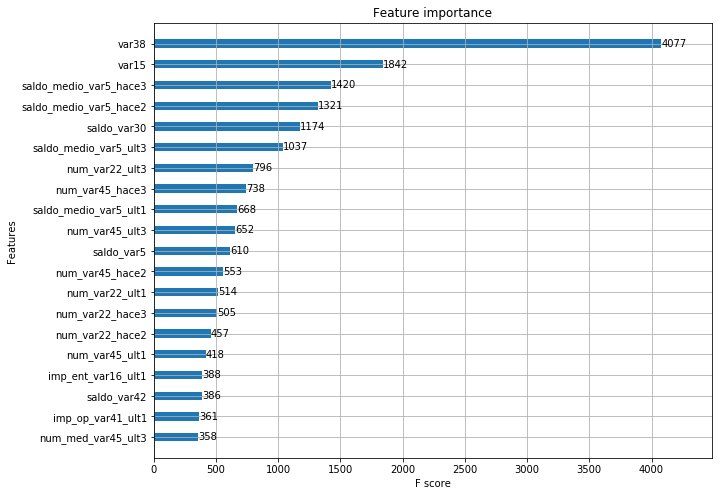

In [13]:
# 피처 중요도 그래프
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

### LightGBM 학습, 파라미터 튜닝

In [15]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals =[(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals,
             verbose=True)

lgbm_roc_score=roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC:{:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.141

[130]	valid_0's auc: 0.83605	valid_0's binary_logloss: 0.140835
[131]	valid_0's auc: 0.836033	valid_0's binary_logloss: 0.140835
[132]	valid_0's auc: 0.836014	valid_0's binary_logloss: 0.140852
[133]	valid_0's auc: 0.835977	valid_0's binary_logloss: 0.1409
[134]	valid_0's auc: 0.835695	valid_0's binary_logloss: 0.140951
[135]	valid_0's auc: 0.835689	valid_0's binary_logloss: 0.140975
[136]	valid_0's auc: 0.83554	valid_0's binary_logloss: 0.141011
[137]	valid_0's auc: 0.835146	valid_0's binary_logloss: 0.141098
[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.139408
ROC AUC:0.8396


In [16]:
# GRidsearch 이용해서 하이퍼파라미터 튜닝: num_leaves, max_depth, min_child_samples, subsample

from sklearn.model_selection import GridSearchCV
import time
crnt_time = time.time()

# n_estimators 200으로
lgbm_clf = LGBMClassifier(n_estimators=200)

params={'num_leaves':[32, 64],
        'max_depth':[128, 160],
        'min_child_samples':[60, 100],
        'subsample':[0.8, 1]}

# cv=3
gridcv=GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
          eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적파라미터', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC:{:.4f}'.format(lgbm_roc_score))

print(time.time()-crnt_time)

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827305	valid_1's binary_logloss: 0.156391
[4]	valid_0's auc: 0.837507	valid_0's binary_logloss: 0.144132	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.15332
[5]	valid_0's auc: 0.842275	valid_0's binary_logloss: 0.141652	valid_1's auc: 0.836036	valid_1's binary_logloss: 0.150954
[6]	valid_0's auc: 0.844971	valid_0's binary_logloss: 0.139662	valid_1's auc: 0.838026	valid_1's binary_logloss: 0.149041
[7]	valid_0's auc: 0.846612	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.147504
[8]	valid_0's auc: 0.848539	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.839506	va

[32]	valid_0's auc: 0.876151	valid_0's binary_logloss: 0.123475	valid_1's auc: 0.838762	valid_1's binary_logloss: 0.13945
[33]	valid_0's auc: 0.877026	valid_0's binary_logloss: 0.123248	valid_1's auc: 0.838799	valid_1's binary_logloss: 0.139439
[34]	valid_0's auc: 0.877606	valid_0's binary_logloss: 0.123057	valid_1's auc: 0.838511	valid_1's binary_logloss: 0.139447
[35]	valid_0's auc: 0.878266	valid_0's binary_logloss: 0.122861	valid_1's auc: 0.838604	valid_1's binary_logloss: 0.139413
[36]	valid_0's auc: 0.87885	valid_0's binary_logloss: 0.122635	valid_1's auc: 0.838919	valid_1's binary_logloss: 0.139347
[37]	valid_0's auc: 0.879609	valid_0's binary_logloss: 0.12236	valid_1's auc: 0.83891	valid_1's binary_logloss: 0.139342
[38]	valid_0's auc: 0.879941	valid_0's binary_logloss: 0.12211	valid_1's auc: 0.838586	valid_1's binary_logloss: 0.139438
[39]	valid_0's auc: 0.880723	valid_0's binary_logloss: 0.121864	valid_1's auc: 0.838655	valid_1's binary_logloss: 0.139421
[40]	valid_0's auc: 0

[33]	valid_0's auc: 0.87536	valid_0's binary_logloss: 0.123718	valid_1's auc: 0.838121	valid_1's binary_logloss: 0.139601
[34]	valid_0's auc: 0.876098	valid_0's binary_logloss: 0.123446	valid_1's auc: 0.838127	valid_1's binary_logloss: 0.13959
[35]	valid_0's auc: 0.876685	valid_0's binary_logloss: 0.123227	valid_1's auc: 0.837767	valid_1's binary_logloss: 0.139632
[36]	valid_0's auc: 0.877273	valid_0's binary_logloss: 0.122984	valid_1's auc: 0.837941	valid_1's binary_logloss: 0.139635
[37]	valid_0's auc: 0.877868	valid_0's binary_logloss: 0.12276	valid_1's auc: 0.83805	valid_1's binary_logloss: 0.139578
[38]	valid_0's auc: 0.878325	valid_0's binary_logloss: 0.122494	valid_1's auc: 0.83832	valid_1's binary_logloss: 0.139527
[39]	valid_0's auc: 0.878917	valid_0's binary_logloss: 0.122248	valid_1's auc: 0.838503	valid_1's binary_logloss: 0.139516
[40]	valid_0's auc: 0.879406	valid_0's binary_logloss: 0.122038	valid_1's auc: 0.838825	valid_1's binary_logloss: 0.139475
[41]	valid_0's auc: 0

[11]	valid_0's auc: 0.856107	valid_0's binary_logloss: 0.133185	valid_1's auc: 0.837895	valid_1's binary_logloss: 0.143788
[12]	valid_0's auc: 0.857143	valid_0's binary_logloss: 0.132348	valid_1's auc: 0.837519	valid_1's binary_logloss: 0.143194
[13]	valid_0's auc: 0.858514	valid_0's binary_logloss: 0.131563	valid_1's auc: 0.837281	valid_1's binary_logloss: 0.142655
[14]	valid_0's auc: 0.859381	valid_0's binary_logloss: 0.130866	valid_1's auc: 0.836814	valid_1's binary_logloss: 0.142234
[15]	valid_0's auc: 0.860107	valid_0's binary_logloss: 0.130265	valid_1's auc: 0.837227	valid_1's binary_logloss: 0.141784
[16]	valid_0's auc: 0.861293	valid_0's binary_logloss: 0.129652	valid_1's auc: 0.837155	valid_1's binary_logloss: 0.141436
[17]	valid_0's auc: 0.862801	valid_0's binary_logloss: 0.129	valid_1's auc: 0.836554	valid_1's binary_logloss: 0.141233
[18]	valid_0's auc: 0.864095	valid_0's binary_logloss: 0.128456	valid_1's auc: 0.836466	valid_1's binary_logloss: 0.140968
[19]	valid_0's auc:

[12]	valid_0's auc: 0.854509	valid_0's binary_logloss: 0.132621	valid_1's auc: 0.838172	valid_1's binary_logloss: 0.143406
[13]	valid_0's auc: 0.856837	valid_0's binary_logloss: 0.131801	valid_1's auc: 0.838172	valid_1's binary_logloss: 0.142845
[14]	valid_0's auc: 0.858379	valid_0's binary_logloss: 0.131085	valid_1's auc: 0.838161	valid_1's binary_logloss: 0.142438
[15]	valid_0's auc: 0.859828	valid_0's binary_logloss: 0.130403	valid_1's auc: 0.837333	valid_1's binary_logloss: 0.142128
[16]	valid_0's auc: 0.861034	valid_0's binary_logloss: 0.129848	valid_1's auc: 0.836715	valid_1's binary_logloss: 0.141806
[17]	valid_0's auc: 0.861775	valid_0's binary_logloss: 0.129299	valid_1's auc: 0.837193	valid_1's binary_logloss: 0.141398
[18]	valid_0's auc: 0.862844	valid_0's binary_logloss: 0.128797	valid_1's auc: 0.837688	valid_1's binary_logloss: 0.141105
[19]	valid_0's auc: 0.864183	valid_0's binary_logloss: 0.128254	valid_1's auc: 0.838493	valid_1's binary_logloss: 0.1408
[20]	valid_0's auc

[26]	valid_0's auc: 0.886554	valid_0's binary_logloss: 0.120291	valid_1's auc: 0.8285	valid_1's binary_logloss: 0.141817
[27]	valid_0's auc: 0.887374	valid_0's binary_logloss: 0.119825	valid_1's auc: 0.828014	valid_1's binary_logloss: 0.141826
[28]	valid_0's auc: 0.888077	valid_0's binary_logloss: 0.11942	valid_1's auc: 0.827886	valid_1's binary_logloss: 0.14177
[29]	valid_0's auc: 0.888773	valid_0's binary_logloss: 0.119041	valid_1's auc: 0.827921	valid_1's binary_logloss: 0.141763
[30]	valid_0's auc: 0.889591	valid_0's binary_logloss: 0.118672	valid_1's auc: 0.828616	valid_1's binary_logloss: 0.141616
[31]	valid_0's auc: 0.889981	valid_0's binary_logloss: 0.118339	valid_1's auc: 0.828525	valid_1's binary_logloss: 0.141555
[32]	valid_0's auc: 0.891237	valid_0's binary_logloss: 0.117949	valid_1's auc: 0.828309	valid_1's binary_logloss: 0.141603
[33]	valid_0's auc: 0.891831	valid_0's binary_logloss: 0.117655	valid_1's auc: 0.827914	valid_1's binary_logloss: 0.141685
[34]	valid_0's auc: 

[9]	valid_0's auc: 0.862422	valid_0's binary_logloss: 0.132596	valid_1's auc: 0.835298	valid_1's binary_logloss: 0.145301
[10]	valid_0's auc: 0.86448	valid_0's binary_logloss: 0.131312	valid_1's auc: 0.836102	valid_1's binary_logloss: 0.144368
[11]	valid_0's auc: 0.86587	valid_0's binary_logloss: 0.130164	valid_1's auc: 0.836347	valid_1's binary_logloss: 0.14376
[12]	valid_0's auc: 0.867975	valid_0's binary_logloss: 0.129168	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.143155
[13]	valid_0's auc: 0.870558	valid_0's binary_logloss: 0.128157	valid_1's auc: 0.836515	valid_1's binary_logloss: 0.142684
[14]	valid_0's auc: 0.872242	valid_0's binary_logloss: 0.127255	valid_1's auc: 0.836322	valid_1's binary_logloss: 0.142312
[15]	valid_0's auc: 0.873758	valid_0's binary_logloss: 0.126426	valid_1's auc: 0.836377	valid_1's binary_logloss: 0.14194
[16]	valid_0's auc: 0.875262	valid_0's binary_logloss: 0.125659	valid_1's auc: 0.835719	valid_1's binary_logloss: 0.141765
[17]	valid_0's auc: 0

[35]	valid_0's auc: 0.893036	valid_0's binary_logloss: 0.116984	valid_1's auc: 0.827162	valid_1's binary_logloss: 0.141867
[36]	valid_0's auc: 0.893952	valid_0's binary_logloss: 0.116643	valid_1's auc: 0.82722	valid_1's binary_logloss: 0.141919
[37]	valid_0's auc: 0.894628	valid_0's binary_logloss: 0.116343	valid_1's auc: 0.827088	valid_1's binary_logloss: 0.141964
[38]	valid_0's auc: 0.895063	valid_0's binary_logloss: 0.11609	valid_1's auc: 0.827376	valid_1's binary_logloss: 0.141947
[39]	valid_0's auc: 0.895511	valid_0's binary_logloss: 0.115776	valid_1's auc: 0.826977	valid_1's binary_logloss: 0.142035
[40]	valid_0's auc: 0.895873	valid_0's binary_logloss: 0.115526	valid_1's auc: 0.827266	valid_1's binary_logloss: 0.142022
Early stopping, best iteration is:
[10]	valid_0's auc: 0.865388	valid_0's binary_logloss: 0.131436	valid_1's auc: 0.83527	valid_1's binary_logloss: 0.145006
[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logl

[17]	valid_0's auc: 0.876886	valid_0's binary_logloss: 0.124929	valid_1's auc: 0.835566	valid_1's binary_logloss: 0.141548
[18]	valid_0's auc: 0.878549	valid_0's binary_logloss: 0.124244	valid_1's auc: 0.835682	valid_1's binary_logloss: 0.141281
[19]	valid_0's auc: 0.880422	valid_0's binary_logloss: 0.12357	valid_1's auc: 0.835543	valid_1's binary_logloss: 0.141181
[20]	valid_0's auc: 0.881339	valid_0's binary_logloss: 0.123016	valid_1's auc: 0.835789	valid_1's binary_logloss: 0.140981
[21]	valid_0's auc: 0.882595	valid_0's binary_logloss: 0.12242	valid_1's auc: 0.83617	valid_1's binary_logloss: 0.140807
[22]	valid_0's auc: 0.883944	valid_0's binary_logloss: 0.121854	valid_1's auc: 0.835977	valid_1's binary_logloss: 0.140685
[23]	valid_0's auc: 0.884786	valid_0's binary_logloss: 0.121312	valid_1's auc: 0.835988	valid_1's binary_logloss: 0.140658
[24]	valid_0's auc: 0.88598	valid_0's binary_logloss: 0.120748	valid_1's auc: 0.83552	valid_1's binary_logloss: 0.140629
[25]	valid_0's auc: 0

[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156466	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165186
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830001	valid_0's binary_logloss: 0.151107	valid_1's auc: 0.82337	valid_1's binary_logloss: 0.15968
[3]	valid_0's auc: 0.839573	valid_0's binary_logloss: 0.147324	valid_1's auc: 0.83264	valid_1's binary_logloss: 0.156063
[4]	valid_0's auc: 0.842992	valid_0's binary_logloss: 0.144391	valid_1's auc: 0.83608	valid_1's binary_logloss: 0.153143
[5]	valid_0's auc: 0.845713	valid_0's binary_logloss: 0.141966	valid_1's auc: 0.838479	valid_1's binary_logloss: 0.150779
[6]	valid_0's auc: 0.848508	valid_0's binary_logloss: 0.139952	valid_1's auc: 0.840056	valid_1's binary_logloss: 0.149011
[7]	valid_0's auc: 0.850111	valid_0's binary_logloss: 0.138313	valid_1's auc: 0.840232	valid_1's binary_logloss: 0.147468
[8]	valid_0's auc: 0.851973	valid_0's binary_logloss: 0.136906	valid_1's auc: 0.839018	va

[32]	valid_0's auc: 0.872917	valid_0's binary_logloss: 0.12477	valid_1's auc: 0.837439	valid_1's binary_logloss: 0.139784
[33]	valid_0's auc: 0.873431	valid_0's binary_logloss: 0.12454	valid_1's auc: 0.837452	valid_1's binary_logloss: 0.139749
[34]	valid_0's auc: 0.874128	valid_0's binary_logloss: 0.124274	valid_1's auc: 0.837524	valid_1's binary_logloss: 0.139762
[35]	valid_0's auc: 0.874804	valid_0's binary_logloss: 0.12402	valid_1's auc: 0.837469	valid_1's binary_logloss: 0.139751
[36]	valid_0's auc: 0.875352	valid_0's binary_logloss: 0.123792	valid_1's auc: 0.83736	valid_1's binary_logloss: 0.139769
[37]	valid_0's auc: 0.87599	valid_0's binary_logloss: 0.123559	valid_1's auc: 0.837238	valid_1's binary_logloss: 0.139757
[38]	valid_0's auc: 0.876681	valid_0's binary_logloss: 0.123367	valid_1's auc: 0.837375	valid_1's binary_logloss: 0.139742
[39]	valid_0's auc: 0.877229	valid_0's binary_logloss: 0.123176	valid_1's auc: 0.837053	valid_1's binary_logloss: 0.139777
[40]	valid_0's auc: 0

[16]	valid_0's auc: 0.857561	valid_0's binary_logloss: 0.130517	valid_1's auc: 0.83725	valid_1's binary_logloss: 0.141464
[17]	valid_0's auc: 0.858305	valid_0's binary_logloss: 0.129992	valid_1's auc: 0.837057	valid_1's binary_logloss: 0.141205
[18]	valid_0's auc: 0.859993	valid_0's binary_logloss: 0.129467	valid_1's auc: 0.836921	valid_1's binary_logloss: 0.140976
[19]	valid_0's auc: 0.86106	valid_0's binary_logloss: 0.129012	valid_1's auc: 0.83589	valid_1's binary_logloss: 0.140875
[20]	valid_0's auc: 0.862262	valid_0's binary_logloss: 0.128583	valid_1's auc: 0.83514	valid_1's binary_logloss: 0.140788
[21]	valid_0's auc: 0.863124	valid_0's binary_logloss: 0.128215	valid_1's auc: 0.834338	valid_1's binary_logloss: 0.140701
[22]	valid_0's auc: 0.864137	valid_0's binary_logloss: 0.127857	valid_1's auc: 0.834962	valid_1's binary_logloss: 0.140517
[23]	valid_0's auc: 0.864726	valid_0's binary_logloss: 0.127534	valid_1's auc: 0.834234	valid_1's binary_logloss: 0.140485
[24]	valid_0's auc: 

[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156592	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165273
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827905	valid_0's binary_logloss: 0.151337	valid_1's auc: 0.82145	valid_1's binary_logloss: 0.160211
[3]	valid_0's auc: 0.837862	valid_0's binary_logloss: 0.147478	valid_1's auc: 0.828696	valid_1's binary_logloss: 0.156489
[4]	valid_0's auc: 0.840611	valid_0's binary_logloss: 0.144436	valid_1's auc: 0.831962	valid_1's binary_logloss: 0.153536
[5]	valid_0's auc: 0.843113	valid_0's binary_logloss: 0.142075	valid_1's auc: 0.834308	valid_1's binary_logloss: 0.151214
[6]	valid_0's auc: 0.84374	valid_0's binary_logloss: 0.140098	valid_1's auc: 0.834377	valid_1's binary_logloss: 0.149386
[7]	valid_0's auc: 0.845284	valid_0's binary_logloss: 0.138482	valid_1's auc: 0.835936	valid_1's binary_logloss: 0.147794
[8]	valid_0's auc: 0.847226	valid_0's binary_logloss: 0.137121	valid_1's auc: 0.836079	v

[68]	valid_0's auc: 0.887601	valid_0's binary_logloss: 0.118505	valid_1's auc: 0.837981	valid_1's binary_logloss: 0.139839
[69]	valid_0's auc: 0.887954	valid_0's binary_logloss: 0.11833	valid_1's auc: 0.83787	valid_1's binary_logloss: 0.139867
[70]	valid_0's auc: 0.888114	valid_0's binary_logloss: 0.118209	valid_1's auc: 0.837718	valid_1's binary_logloss: 0.139919
[71]	valid_0's auc: 0.888481	valid_0's binary_logloss: 0.118049	valid_1's auc: 0.837821	valid_1's binary_logloss: 0.139893
[72]	valid_0's auc: 0.888835	valid_0's binary_logloss: 0.117903	valid_1's auc: 0.837731	valid_1's binary_logloss: 0.139952
[73]	valid_0's auc: 0.889134	valid_0's binary_logloss: 0.117758	valid_1's auc: 0.837899	valid_1's binary_logloss: 0.139962
[74]	valid_0's auc: 0.889144	valid_0's binary_logloss: 0.117691	valid_1's auc: 0.83792	valid_1's binary_logloss: 0.13998
[75]	valid_0's auc: 0.889275	valid_0's binary_logloss: 0.117578	valid_1's auc: 0.838045	valid_1's binary_logloss: 0.139953
[76]	valid_0's auc: 

[8]	valid_0's auc: 0.863742	valid_0's binary_logloss: 0.134702	valid_1's auc: 0.837366	valid_1's binary_logloss: 0.145789
[9]	valid_0's auc: 0.865288	valid_0's binary_logloss: 0.1333	valid_1's auc: 0.838092	valid_1's binary_logloss: 0.144676
[10]	valid_0's auc: 0.866558	valid_0's binary_logloss: 0.132065	valid_1's auc: 0.838732	valid_1's binary_logloss: 0.143753
[11]	valid_0's auc: 0.867378	valid_0's binary_logloss: 0.131005	valid_1's auc: 0.838939	valid_1's binary_logloss: 0.142985
[12]	valid_0's auc: 0.868402	valid_0's binary_logloss: 0.130046	valid_1's auc: 0.837922	valid_1's binary_logloss: 0.142418
[13]	valid_0's auc: 0.869713	valid_0's binary_logloss: 0.12914	valid_1's auc: 0.838282	valid_1's binary_logloss: 0.141868
[14]	valid_0's auc: 0.870702	valid_0's binary_logloss: 0.128307	valid_1's auc: 0.838019	valid_1's binary_logloss: 0.141374
[15]	valid_0's auc: 0.871975	valid_0's binary_logloss: 0.127523	valid_1's auc: 0.83802	valid_1's binary_logloss: 0.140933
[16]	valid_0's auc: 0.

[37]	valid_0's auc: 0.893202	valid_0's binary_logloss: 0.117331	valid_1's auc: 0.835858	valid_1's binary_logloss: 0.140014
[38]	valid_0's auc: 0.893881	valid_0's binary_logloss: 0.117028	valid_1's auc: 0.835594	valid_1's binary_logloss: 0.140116
[39]	valid_0's auc: 0.89439	valid_0's binary_logloss: 0.11671	valid_1's auc: 0.8355	valid_1's binary_logloss: 0.140166
[40]	valid_0's auc: 0.894767	valid_0's binary_logloss: 0.116439	valid_1's auc: 0.835564	valid_1's binary_logloss: 0.140175
[41]	valid_0's auc: 0.895261	valid_0's binary_logloss: 0.116161	valid_1's auc: 0.835399	valid_1's binary_logloss: 0.140228
[42]	valid_0's auc: 0.895782	valid_0's binary_logloss: 0.115888	valid_1's auc: 0.835369	valid_1's binary_logloss: 0.14032
[43]	valid_0's auc: 0.895994	valid_0's binary_logloss: 0.115655	valid_1's auc: 0.835382	valid_1's binary_logloss: 0.140379
[44]	valid_0's auc: 0.896287	valid_0's binary_logloss: 0.115426	valid_1's auc: 0.835169	valid_1's binary_logloss: 0.140406
[45]	valid_0's auc: 0

[1]	valid_0's auc: 0.830474	valid_0's binary_logloss: 0.155928	valid_1's auc: 0.817343	valid_1's binary_logloss: 0.164928
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842991	valid_0's binary_logloss: 0.150276	valid_1's auc: 0.827907	valid_1's binary_logloss: 0.159411
[3]	valid_0's auc: 0.851825	valid_0's binary_logloss: 0.146251	valid_1's auc: 0.832413	valid_1's binary_logloss: 0.155739
[4]	valid_0's auc: 0.854455	valid_0's binary_logloss: 0.143091	valid_1's auc: 0.833987	valid_1's binary_logloss: 0.15282
[5]	valid_0's auc: 0.857038	valid_0's binary_logloss: 0.140521	valid_1's auc: 0.836024	valid_1's binary_logloss: 0.150456
[6]	valid_0's auc: 0.859784	valid_0's binary_logloss: 0.138303	valid_1's auc: 0.836565	valid_1's binary_logloss: 0.148558
[7]	valid_0's auc: 0.861991	valid_0's binary_logloss: 0.13638	valid_1's auc: 0.837355	valid_1's binary_logloss: 0.147071
[8]	valid_0's auc: 0.863742	valid_0's binary_logloss: 0.134702	valid_1's auc: 0.837366	

[25]	valid_0's auc: 0.883523	valid_0's binary_logloss: 0.121852	valid_1's auc: 0.836558	valid_1's binary_logloss: 0.140159
[26]	valid_0's auc: 0.88437	valid_0's binary_logloss: 0.121425	valid_1's auc: 0.83683	valid_1's binary_logloss: 0.140016
[27]	valid_0's auc: 0.885636	valid_0's binary_logloss: 0.120914	valid_1's auc: 0.836819	valid_1's binary_logloss: 0.13996
[28]	valid_0's auc: 0.886325	valid_0's binary_logloss: 0.120555	valid_1's auc: 0.837376	valid_1's binary_logloss: 0.139864
[29]	valid_0's auc: 0.887055	valid_0's binary_logloss: 0.120163	valid_1's auc: 0.836929	valid_1's binary_logloss: 0.139938
[30]	valid_0's auc: 0.887923	valid_0's binary_logloss: 0.119761	valid_1's auc: 0.836813	valid_1's binary_logloss: 0.13991
[31]	valid_0's auc: 0.888783	valid_0's binary_logloss: 0.11938	valid_1's auc: 0.836207	valid_1's binary_logloss: 0.139954
[32]	valid_0's auc: 0.889881	valid_0's binary_logloss: 0.118999	valid_1's auc: 0.836409	valid_1's binary_logloss: 0.139895
[33]	valid_0's auc: 0

[34]	valid_0's auc: 0.876838	valid_0's binary_logloss: 0.123273	valid_1's auc: 0.834188	valid_1's binary_logloss: 0.140029
[35]	valid_0's auc: 0.877285	valid_0's binary_logloss: 0.123033	valid_1's auc: 0.833868	valid_1's binary_logloss: 0.140083
[36]	valid_0's auc: 0.877822	valid_0's binary_logloss: 0.122827	valid_1's auc: 0.833427	valid_1's binary_logloss: 0.140161
[37]	valid_0's auc: 0.87835	valid_0's binary_logloss: 0.122582	valid_1's auc: 0.833781	valid_1's binary_logloss: 0.140133
[38]	valid_0's auc: 0.878728	valid_0's binary_logloss: 0.122378	valid_1's auc: 0.833827	valid_1's binary_logloss: 0.140119
[39]	valid_0's auc: 0.879195	valid_0's binary_logloss: 0.122177	valid_1's auc: 0.833696	valid_1's binary_logloss: 0.140111
Early stopping, best iteration is:
[9]	valid_0's auc: 0.850098	valid_0's binary_logloss: 0.135283	valid_1's auc: 0.84033	valid_1's binary_logloss: 0.144934
[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_log

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827305	valid_1's binary_logloss: 0.156391
[4]	valid_0's auc: 0.837507	valid_0's binary_logloss: 0.144132	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.15332
[5]	valid_0's auc: 0.842275	valid_0's binary_logloss: 0.141652	valid_1's auc: 0.836036	valid_1's binary_logloss: 0.150954
[6]	valid_0's auc: 0.844971	valid_0's binary_logloss: 0.139662	valid_1's auc: 0.838026	valid_1's binary_logloss: 0.149041
[7]	valid_0's auc: 0.846612	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.147504
[8]	valid_0's auc: 0.848539	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.839506	va

[32]	valid_0's auc: 0.876151	valid_0's binary_logloss: 0.123475	valid_1's auc: 0.838762	valid_1's binary_logloss: 0.13945
[33]	valid_0's auc: 0.877026	valid_0's binary_logloss: 0.123248	valid_1's auc: 0.838799	valid_1's binary_logloss: 0.139439
[34]	valid_0's auc: 0.877606	valid_0's binary_logloss: 0.123057	valid_1's auc: 0.838511	valid_1's binary_logloss: 0.139447
[35]	valid_0's auc: 0.878266	valid_0's binary_logloss: 0.122861	valid_1's auc: 0.838604	valid_1's binary_logloss: 0.139413
[36]	valid_0's auc: 0.87885	valid_0's binary_logloss: 0.122635	valid_1's auc: 0.838919	valid_1's binary_logloss: 0.139347
[37]	valid_0's auc: 0.879609	valid_0's binary_logloss: 0.12236	valid_1's auc: 0.83891	valid_1's binary_logloss: 0.139342
[38]	valid_0's auc: 0.879941	valid_0's binary_logloss: 0.12211	valid_1's auc: 0.838586	valid_1's binary_logloss: 0.139438
[39]	valid_0's auc: 0.880723	valid_0's binary_logloss: 0.121864	valid_1's auc: 0.838655	valid_1's binary_logloss: 0.139421
[40]	valid_0's auc: 0

[35]	valid_0's auc: 0.893036	valid_0's binary_logloss: 0.116984	valid_1's auc: 0.827162	valid_1's binary_logloss: 0.141867
[36]	valid_0's auc: 0.893952	valid_0's binary_logloss: 0.116643	valid_1's auc: 0.82722	valid_1's binary_logloss: 0.141919
[37]	valid_0's auc: 0.894628	valid_0's binary_logloss: 0.116343	valid_1's auc: 0.827088	valid_1's binary_logloss: 0.141964
[38]	valid_0's auc: 0.895063	valid_0's binary_logloss: 0.11609	valid_1's auc: 0.827376	valid_1's binary_logloss: 0.141947
[39]	valid_0's auc: 0.895511	valid_0's binary_logloss: 0.115776	valid_1's auc: 0.826977	valid_1's binary_logloss: 0.142035
[40]	valid_0's auc: 0.895873	valid_0's binary_logloss: 0.115526	valid_1's auc: 0.827266	valid_1's binary_logloss: 0.142022
Early stopping, best iteration is:
[10]	valid_0's auc: 0.865388	valid_0's binary_logloss: 0.131436	valid_1's auc: 0.83527	valid_1's binary_logloss: 0.145006
[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logl

[20]	valid_0's auc: 0.881339	valid_0's binary_logloss: 0.123016	valid_1's auc: 0.835789	valid_1's binary_logloss: 0.140981
[21]	valid_0's auc: 0.882595	valid_0's binary_logloss: 0.12242	valid_1's auc: 0.83617	valid_1's binary_logloss: 0.140807
[22]	valid_0's auc: 0.883944	valid_0's binary_logloss: 0.121854	valid_1's auc: 0.835977	valid_1's binary_logloss: 0.140685
[23]	valid_0's auc: 0.884786	valid_0's binary_logloss: 0.121312	valid_1's auc: 0.835988	valid_1's binary_logloss: 0.140658
[24]	valid_0's auc: 0.88598	valid_0's binary_logloss: 0.120748	valid_1's auc: 0.83552	valid_1's binary_logloss: 0.140629
[25]	valid_0's auc: 0.887201	valid_0's binary_logloss: 0.120274	valid_1's auc: 0.835925	valid_1's binary_logloss: 0.14052
[26]	valid_0's auc: 0.888423	valid_0's binary_logloss: 0.119775	valid_1's auc: 0.835694	valid_1's binary_logloss: 0.140493
[27]	valid_0's auc: 0.889313	valid_0's binary_logloss: 0.119337	valid_1's auc: 0.835559	valid_1's binary_logloss: 0.140489
[28]	valid_0's auc: 0

[9]	valid_0's auc: 0.865686	valid_0's binary_logloss: 0.132456	valid_1's auc: 0.836224	valid_1's binary_logloss: 0.145138
[10]	valid_0's auc: 0.867095	valid_0's binary_logloss: 0.131167	valid_1's auc: 0.83568	valid_1's binary_logloss: 0.144312
[11]	valid_0's auc: 0.868321	valid_0's binary_logloss: 0.130032	valid_1's auc: 0.836598	valid_1's binary_logloss: 0.143512
[12]	valid_0's auc: 0.870342	valid_0's binary_logloss: 0.128915	valid_1's auc: 0.836786	valid_1's binary_logloss: 0.142896
[13]	valid_0's auc: 0.871602	valid_0's binary_logloss: 0.127987	valid_1's auc: 0.837475	valid_1's binary_logloss: 0.142313
[14]	valid_0's auc: 0.873492	valid_0's binary_logloss: 0.127074	valid_1's auc: 0.837308	valid_1's binary_logloss: 0.141918
[15]	valid_0's auc: 0.874714	valid_0's binary_logloss: 0.126249	valid_1's auc: 0.837265	valid_1's binary_logloss: 0.141545
[16]	valid_0's auc: 0.876498	valid_0's binary_logloss: 0.125412	valid_1's auc: 0.837064	valid_1's binary_logloss: 0.141306
[17]	valid_0's auc

[32]	valid_0's auc: 0.893404	valid_0's binary_logloss: 0.117315	valid_1's auc: 0.834945	valid_1's binary_logloss: 0.140444
[33]	valid_0's auc: 0.894165	valid_0's binary_logloss: 0.116905	valid_1's auc: 0.834973	valid_1's binary_logloss: 0.140407
[34]	valid_0's auc: 0.895202	valid_0's binary_logloss: 0.116504	valid_1's auc: 0.835507	valid_1's binary_logloss: 0.140299
[35]	valid_0's auc: 0.896193	valid_0's binary_logloss: 0.116137	valid_1's auc: 0.835906	valid_1's binary_logloss: 0.140215
[36]	valid_0's auc: 0.896674	valid_0's binary_logloss: 0.115852	valid_1's auc: 0.836061	valid_1's binary_logloss: 0.140177
[37]	valid_0's auc: 0.897433	valid_0's binary_logloss: 0.115534	valid_1's auc: 0.836293	valid_1's binary_logloss: 0.140099
[38]	valid_0's auc: 0.897849	valid_0's binary_logloss: 0.115209	valid_1's auc: 0.835887	valid_1's binary_logloss: 0.140252
[39]	valid_0's auc: 0.898318	valid_0's binary_logloss: 0.114876	valid_1's auc: 0.835559	valid_1's binary_logloss: 0.140398
[40]	valid_0's a

[17]	valid_0's auc: 0.861101	valid_0's binary_logloss: 0.129656	valid_1's auc: 0.838785	valid_1's binary_logloss: 0.140731
[18]	valid_0's auc: 0.862022	valid_0's binary_logloss: 0.12915	valid_1's auc: 0.839358	valid_1's binary_logloss: 0.140433
[19]	valid_0's auc: 0.863252	valid_0's binary_logloss: 0.128659	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.140181
[20]	valid_0's auc: 0.863823	valid_0's binary_logloss: 0.128254	valid_1's auc: 0.840096	valid_1's binary_logloss: 0.139974
[21]	valid_0's auc: 0.864524	valid_0's binary_logloss: 0.127855	valid_1's auc: 0.840183	valid_1's binary_logloss: 0.139827
[22]	valid_0's auc: 0.865553	valid_0's binary_logloss: 0.127461	valid_1's auc: 0.840042	valid_1's binary_logloss: 0.139714
[23]	valid_0's auc: 0.866427	valid_0's binary_logloss: 0.127109	valid_1's auc: 0.839501	valid_1's binary_logloss: 0.13974
[24]	valid_0's auc: 0.86716	valid_0's binary_logloss: 0.126769	valid_1's auc: 0.83965	valid_1's binary_logloss: 0.13959
[25]	valid_0's auc: 0

[26]	valid_0's auc: 0.867382	valid_0's binary_logloss: 0.12659	valid_1's auc: 0.833512	valid_1's binary_logloss: 0.140383
[27]	valid_0's auc: 0.868358	valid_0's binary_logloss: 0.126275	valid_1's auc: 0.833055	valid_1's binary_logloss: 0.140387
[28]	valid_0's auc: 0.869148	valid_0's binary_logloss: 0.125976	valid_1's auc: 0.832858	valid_1's binary_logloss: 0.140345
[29]	valid_0's auc: 0.869606	valid_0's binary_logloss: 0.125736	valid_1's auc: 0.832855	valid_1's binary_logloss: 0.140309
[30]	valid_0's auc: 0.870141	valid_0's binary_logloss: 0.125482	valid_1's auc: 0.83291	valid_1's binary_logloss: 0.140261
[31]	valid_0's auc: 0.871526	valid_0's binary_logloss: 0.125141	valid_1's auc: 0.833609	valid_1's binary_logloss: 0.140128
[32]	valid_0's auc: 0.871929	valid_0's binary_logloss: 0.124941	valid_1's auc: 0.833536	valid_1's binary_logloss: 0.14009
[33]	valid_0's auc: 0.872798	valid_0's binary_logloss: 0.124718	valid_1's auc: 0.833168	valid_1's binary_logloss: 0.140121
[34]	valid_0's auc:

[79]	valid_0's auc: 0.889725	valid_0's binary_logloss: 0.117242	valid_1's auc: 0.837296	valid_1's binary_logloss: 0.140191
[80]	valid_0's auc: 0.890095	valid_0's binary_logloss: 0.117092	valid_1's auc: 0.837436	valid_1's binary_logloss: 0.140182
[81]	valid_0's auc: 0.890237	valid_0's binary_logloss: 0.116991	valid_1's auc: 0.837617	valid_1's binary_logloss: 0.140185
[82]	valid_0's auc: 0.89035	valid_0's binary_logloss: 0.116893	valid_1's auc: 0.837676	valid_1's binary_logloss: 0.140191
[83]	valid_0's auc: 0.890464	valid_0's binary_logloss: 0.116801	valid_1's auc: 0.837537	valid_1's binary_logloss: 0.140249
[84]	valid_0's auc: 0.890869	valid_0's binary_logloss: 0.116619	valid_1's auc: 0.837565	valid_1's binary_logloss: 0.140263
[85]	valid_0's auc: 0.891174	valid_0's binary_logloss: 0.116509	valid_1's auc: 0.837241	valid_1's binary_logloss: 0.140345
[86]	valid_0's auc: 0.891255	valid_0's binary_logloss: 0.116424	valid_1's auc: 0.837141	valid_1's binary_logloss: 0.140382
Early stopping, b

[42]	valid_0's auc: 0.895782	valid_0's binary_logloss: 0.115888	valid_1's auc: 0.835369	valid_1's binary_logloss: 0.14032
[43]	valid_0's auc: 0.895994	valid_0's binary_logloss: 0.115655	valid_1's auc: 0.835382	valid_1's binary_logloss: 0.140379
[44]	valid_0's auc: 0.896287	valid_0's binary_logloss: 0.115426	valid_1's auc: 0.835169	valid_1's binary_logloss: 0.140406
[45]	valid_0's auc: 0.896767	valid_0's binary_logloss: 0.115148	valid_1's auc: 0.835223	valid_1's binary_logloss: 0.140418
[46]	valid_0's auc: 0.897406	valid_0's binary_logloss: 0.114846	valid_1's auc: 0.835554	valid_1's binary_logloss: 0.140402
[47]	valid_0's auc: 0.897922	valid_0's binary_logloss: 0.114594	valid_1's auc: 0.835407	valid_1's binary_logloss: 0.140445
[48]	valid_0's auc: 0.898413	valid_0's binary_logloss: 0.114317	valid_1's auc: 0.835472	valid_1's binary_logloss: 0.140451
[49]	valid_0's auc: 0.89881	valid_0's binary_logloss: 0.114115	valid_1's auc: 0.835652	valid_1's binary_logloss: 0.14045
[50]	valid_0's auc:

[9]	valid_0's auc: 0.865288	valid_0's binary_logloss: 0.1333	valid_1's auc: 0.838092	valid_1's binary_logloss: 0.144676
[10]	valid_0's auc: 0.866558	valid_0's binary_logloss: 0.132065	valid_1's auc: 0.838732	valid_1's binary_logloss: 0.143753
[11]	valid_0's auc: 0.867378	valid_0's binary_logloss: 0.131005	valid_1's auc: 0.838939	valid_1's binary_logloss: 0.142985
[12]	valid_0's auc: 0.868402	valid_0's binary_logloss: 0.130046	valid_1's auc: 0.837922	valid_1's binary_logloss: 0.142418
[13]	valid_0's auc: 0.869713	valid_0's binary_logloss: 0.12914	valid_1's auc: 0.838282	valid_1's binary_logloss: 0.141868
[14]	valid_0's auc: 0.870702	valid_0's binary_logloss: 0.128307	valid_1's auc: 0.838019	valid_1's binary_logloss: 0.141374
[15]	valid_0's auc: 0.871975	valid_0's binary_logloss: 0.127523	valid_1's auc: 0.83802	valid_1's binary_logloss: 0.140933
[16]	valid_0's auc: 0.873071	valid_0's binary_logloss: 0.126793	valid_1's auc: 0.838163	valid_1's binary_logloss: 0.140591
[17]	valid_0's auc: 0

[34]	valid_0's auc: 0.891155	valid_0's binary_logloss: 0.118351	valid_1's auc: 0.836137	valid_1's binary_logloss: 0.139964
[35]	valid_0's auc: 0.891785	valid_0's binary_logloss: 0.118001	valid_1's auc: 0.836228	valid_1's binary_logloss: 0.139945
[36]	valid_0's auc: 0.89242	valid_0's binary_logloss: 0.117642	valid_1's auc: 0.836019	valid_1's binary_logloss: 0.139981
[37]	valid_0's auc: 0.893202	valid_0's binary_logloss: 0.117331	valid_1's auc: 0.835858	valid_1's binary_logloss: 0.140014
[38]	valid_0's auc: 0.893881	valid_0's binary_logloss: 0.117028	valid_1's auc: 0.835594	valid_1's binary_logloss: 0.140116
[39]	valid_0's auc: 0.89439	valid_0's binary_logloss: 0.11671	valid_1's auc: 0.8355	valid_1's binary_logloss: 0.140166
[40]	valid_0's auc: 0.894767	valid_0's binary_logloss: 0.116439	valid_1's auc: 0.835564	valid_1's binary_logloss: 0.140175
[41]	valid_0's auc: 0.895261	valid_0's binary_logloss: 0.116161	valid_1's auc: 0.835399	valid_1's binary_logloss: 0.140228
[42]	valid_0's auc: 0

[44]	valid_0's auc: 0.891757	valid_0's binary_logloss: 0.119626	valid_1's auc: 0.843283	valid_1's binary_logloss: 0.1383
[45]	valid_0's auc: 0.892343	valid_0's binary_logloss: 0.119426	valid_1's auc: 0.84332	valid_1's binary_logloss: 0.138306
[46]	valid_0's auc: 0.892986	valid_0's binary_logloss: 0.119211	valid_1's auc: 0.843346	valid_1's binary_logloss: 0.138288
[47]	valid_0's auc: 0.89341	valid_0's binary_logloss: 0.119028	valid_1's auc: 0.843385	valid_1's binary_logloss: 0.138241
[48]	valid_0's auc: 0.894062	valid_0's binary_logloss: 0.118789	valid_1's auc: 0.843166	valid_1's binary_logloss: 0.138298
[49]	valid_0's auc: 0.894734	valid_0's binary_logloss: 0.118543	valid_1's auc: 0.843193	valid_1's binary_logloss: 0.138271
[50]	valid_0's auc: 0.895288	valid_0's binary_logloss: 0.118352	valid_1's auc: 0.842965	valid_1's binary_logloss: 0.138309
[51]	valid_0's auc: 0.895902	valid_0's binary_logloss: 0.118145	valid_1's auc: 0.842827	valid_1's binary_logloss: 0.138343
[52]	valid_0's auc: 

In [17]:
# 하이퍼 파라미터 다시 적용해서 학습
lgbm_clf=LGBMClassifier(n_estimators=1000, num_leaves=32, subsample=0.8,
                        min_child_subsamples=100, max_depth=128)

evals=[(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
             eval_set=evals, verbose=True)

lgbm_roc_score=roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC:{:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817683	valid_0's binary_logloss: 0.164974
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818838	valid_0's binary_logloss: 0.159922
[3]	valid_0's auc: 0.827931	valid_0's binary_logloss: 0.15621
[4]	valid_0's auc: 0.832434	valid_0's binary_logloss: 0.153347
[5]	valid_0's auc: 0.83485	valid_0's binary_logloss: 0.151123
[6]	valid_0's auc: 0.835631	valid_0's binary_logloss: 0.149208
[7]	valid_0's auc: 0.836946	valid_0's binary_logloss: 0.147774
[8]	valid_0's auc: 0.838347	valid_0's binary_logloss: 0.146507
[9]	valid_0's auc: 0.839868	valid_0's binary_logloss: 0.145421
[10]	valid_0's auc: 0.840662	valid_0's binary_logloss: 0.144572
[11]	valid_0's auc: 0.840298	valid_0's binary_logloss: 0.14389
[12]	valid_0's auc: 0.840215	valid_0's binary_logloss: 0.14322
[13]	valid_0's auc: 0.840652	valid_0's binary_logloss: 0.142587
[14]	valid_0's auc: 0.840419	valid_0's binary_logloss: 0.142064
[15]	valid_0's auc: 0.841346	valid_0's binary_logloss: 

[132]	valid_0's auc: 0.837021	valid_0's binary_logloss: 0.140379
[133]	valid_0's auc: 0.83681	valid_0's binary_logloss: 0.14048
[134]	valid_0's auc: 0.836922	valid_0's binary_logloss: 0.140477
[135]	valid_0's auc: 0.83681	valid_0's binary_logloss: 0.140518
[136]	valid_0's auc: 0.836753	valid_0's binary_logloss: 0.140552
[137]	valid_0's auc: 0.836721	valid_0's binary_logloss: 0.14057
[138]	valid_0's auc: 0.836619	valid_0's binary_logloss: 0.140597
[139]	valid_0's auc: 0.836371	valid_0's binary_logloss: 0.140678
[140]	valid_0's auc: 0.836227	valid_0's binary_logloss: 0.140718
[141]	valid_0's auc: 0.836273	valid_0's binary_logloss: 0.140714
[142]	valid_0's auc: 0.836039	valid_0's binary_logloss: 0.140777
[143]	valid_0's auc: 0.835963	valid_0's binary_logloss: 0.140804
[144]	valid_0's auc: 0.835871	valid_0's binary_logloss: 0.140828
[145]	valid_0's auc: 0.835618	valid_0's binary_logloss: 0.140917
[146]	valid_0's auc: 0.835473	valid_0's binary_logloss: 0.140954
[147]	valid_0's auc: 0.835207

## 9. 분류 실습 - 캐글 신용카드 사기 검출

### 언더 샘플링, 오버 샘플링
- 이상 레이블 데이터 건수가, 정상 레이블 데이터 건수에 비해 너무 적을 때 성능 문제가 발생
- 이상 레이블에 대해 다양한 유형을 학습하지 못함, 정상 레이블 건수는 많아서 일방적으로 정상 레이블로 치우친 학습 수행
- 적절한 학습 데이터 확보의 필요성 : 오버 샘플링 or 언더 샘플링
- 오버 샘플링이 예측 성능상 더 유리한 경우가 많다.

- 언더 샘플링 : 많은 거를 적은 거에 맞춘다(줄임)
- 오버 샘플링 : 적은 거를 많은 거에 맞춘다(늘림)



- 오버샘플링을 단순 증식으로만 하면 과적합되기 때문에, 원본 데이터의 피처 값들을 약간씩 변경하여 증식
- 대표적으로 SMOTE 방법이 있다. -> 적은 데이터 세트의 개별 데이터들의 K최근접이웃을 찾아서 이 데이터와 K개 이웃들 차이를 일정 값으로 만들어서 기존 데이터가 약간 차이가 나도록
- p263
- SMOTE 구현 패키지 : imbalanced-learn

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv("credit_card_fraud/creditcard.csv")
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [52]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [53]:
# 데이터 사전 가공 수행, 이에 따른 예측 성능을 함께 비교할 것
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사해서, Time 칼럼만 삭제하고 복사된 DF변환
def get_preprocessed_df(df=None):
    df_copy=df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [54]:
# 학습 피쳐/레이블, 테스트 피쳐/레이블 데이터셋 반환
def get_train_test_dataset(df=None):
    # 인자로 입력된 DF의 사전 가공이 완료된 복사 DAtaFrame반환
    df_copy=get_preprocessed_df(df)
    # Dataframe의 마지막 칼럼이 레이블, 나머지는 피처
    X_features=df_copy.iloc[:, :-1]
    y_target=df_copy.iloc[:, -1]
    # train_test_split()으로 학습테스트데이터 분할, stratify하기
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, 
                                                       test_size=0.3, random_state=0,
                                                       stratify=y_target)
    # 학습, 테스트 데이터 세트 변환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [55]:
print('학습레이블비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트레이블비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습레이블비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트레이블비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [56]:
from Week3_Evaluation import get_clf_eval

In [57]:
# 로지스틱 회귀, LightGBM 기반 두가지로 데이터 가공 수행
import import_ipynb
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 3장에서 사용한 get_clf_eval() 또 사용
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차행렬
[[85282    13]
 [   57    91]]
정확도:0.9992, 정밀도:0.8750, 재현율:0.6149, F1:0.7222, AUC:0.9576


In [58]:
# LightGBM 이용
# 반복적으로 모델 변경, 학습/예측/평가할 것이므로 . 별도의 함수 생성
# 인자로 사이킷런 Estimator와 학습/테스트 데이터셋을 입력받아 학습/예측/평가 수행

def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred=model.predict(ftr_test)
    pred_proba=model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [59]:
# 중요 : boost_from_average = False 해야 불균형 레이블 값 분포에서 성능 저하 방지할수 있음
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1,
                          boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train,
                    tgt_test=y_test)

오차행렬
[[85289     6]
 [   36   112]]
정확도:0.9995, 정밀도:0.9492, 재현율:0.7568, F1:0.8421, AUC:0.9797


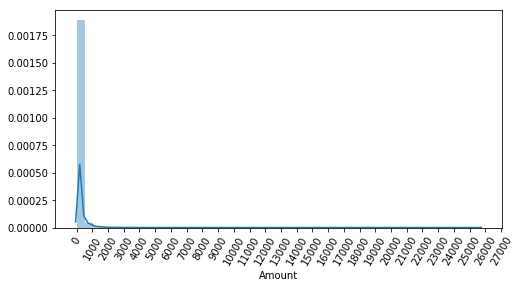

In [60]:
# 데이터 분포도를 변환한 뒤 모델 학습/예측/평가
# 먼저 중요 피처 값 분포도 확인 : 선형 모델은 중요 피처들의 값이 정규분포 형태를 유지하는 것을 선호

import seaborn as sns
plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

Amount -> 카드 사용금액. 1000불 이하인 데이터가 대부분, 꼬리가 긴 형태의 분포 곡선
- 정규 분포형태로 변환한 뒤 LR 예측 성능확인

In [61]:
# get_preprocessed_df 함수를 StandardScaler를 이용해 정규분포 형태로 변환하도록 함
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy=df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 amount를 이름 변경하고, DataFrame 맨 앞 칼럼으로
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 time, Amount피쳐 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [62]:
# 그다음 학습/예측/평가

X_train, X_test, y_train, y_test=get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train,
                    tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train,
                    tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85281    14]
 [   58    90]]
정확도:0.9992, 정밀도:0.8654, 재현율:0.6081, F1:0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
오차행렬
[[85289     6]
 [   36   112]]
정확도:0.9995, 정밀도:0.9492, 재현율:0.7568, F1:0.8421, AUC:0.9773


In [63]:
# 로그 변환 하기. 데이터 분포도가 심하게 왜곡되어 있을 경우 적용하는 방법

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p() 이용해 Amount를 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [71]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train,
                    tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train,
                    tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85281    14]
 [   48    98]]
정확도:0.9993, 정밀도:0.8750, 재현율:0.6712, F1:0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
오차행렬
[[85291     4]
 [   25   121]]
정확도:0.9997, 정밀도:0.9680, 재현율:0.8288, F1:0.8930, AUC:0.9831


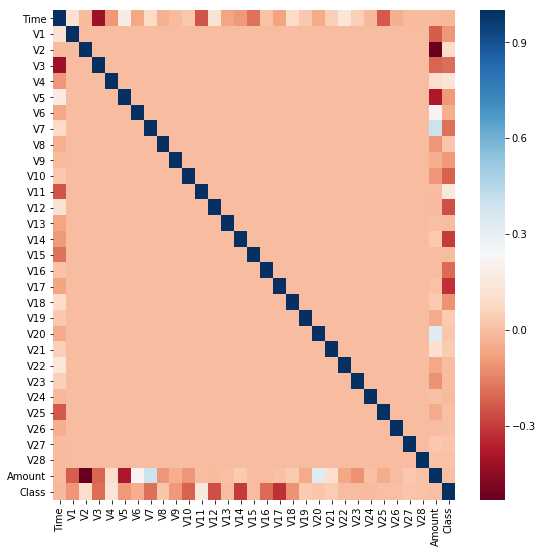

In [72]:
# 이상치 제거 후 모델 학습/예측/평가

# IQR 방식을 적용한 이상치 제거 방식. 사분위값 편차를 이용하는 기법, Box plot으로 시각화
# 데이터의 숫자를 25%, 50%, 75% 순으로 4구간으로 나눈다. 0, Q1, Q2, Q3, Q4로
# IQR = Q3-Q1
# IQR에 1.5를 곱해서 생성된 범위로 최댓값, 최솟값을 결정한다.

# 피처가 많을 경우, 이들 중 결정값과 가장 상관성이 높은 피쳐 위주로 이상치를 검출해야 함

import seaborn as sns
plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')


In [73]:
# V14에 대해 이상치를 찾아 제거, IQR을 이용해 이상치를 검출하는 함수 생성하여 검출된 이상치를 삭제

import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4와 3/4분위를 np.percentile로
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR 구하고, 1.5를 곱해 최대/최소 지점
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최댓값보다 크거나 최솟값보다 작은 값을 이상치로 설정, DF index 반환
    outlier_index = fraud[(fraud<lowest_val)|(fraud>highest_val)].index
    return outlier_index

In [74]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [75]:
# get_preprocessed_df() 를 로그변환 후 V14 피처의 이상치 데이터를 삭제하도록
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis = 0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train,
                    tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train,
                    tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85281    14]
 [   48    98]]
정확도:0.9993, 정밀도:0.8750, 재현율:0.6712, F1:0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
오차행렬
[[85291     4]
 [   25   121]]
정확도:0.9997, 정밀도:0.9680, 재현율:0.8288, F1:0.8930, AUC:0.9831


In [79]:
# SMOTE oversampling 적용후 모델 학습/예측/평가
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 전 : ', X_train.shape, y_train.shape)
print('SMOTE 후 : ', X_train_over.shape, y_train_over.shape)
print('SMOTE 후 레이블분포:\n', pd.Series(y_train_over).value_counts())

ModuleNotFoundError: No module named 'sklearn.neighbors.base'

In [81]:
import sklearn.neighbors

dir(sklearn.neighbors)

['BallTree',
 'DistanceMetric',
 'KDTree',
 'KNeighborsClassifier',
 'KNeighborsRegressor',
 'KNeighborsTransformer',
 'KernelDensity',
 'LocalOutlierFactor',
 'NearestCentroid',
 'NearestNeighbors',
 'NeighborhoodComponentsAnalysis',
 'RadiusNeighborsClassifier',
 'RadiusNeighborsRegressor',
 'RadiusNeighborsTransformer',
 'VALID_METRICS',
 'VALID_METRICS_SPARSE',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_ball_tree',
 '_base',
 '_classification',
 '_dist_metrics',
 '_graph',
 '_kd_tree',
 '_kde',
 '_lof',
 '_nca',
 '_nearest_centroid',
 '_regression',
 '_typedefs',
 '_unsupervised',
 'kneighbors_graph',
 'radius_neighbors_graph']

## 10. 스태킹 앙상블
- 개별적인 여러 알고리즘을 결합해 예측 결과를 도출(Bagging, Boosting과 공통점)
- 큰 차이점은, 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행한다는 것


In [1]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2,
                                                    random_state=0)

In [4]:
# 개별 ML모델 객체 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터세트를 학습, 예측할 최종모델.
lr_final = LogisticRegression(C=10)

# 개별 모델 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

# 학습된 개별 모델들이 반환하는 예측 데이터 세트 생성, 개별 모델 정확도 측정
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN:{:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('RF:{:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('DT:{:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('ADA:{:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN:0.9211
RF:0.9649
DT:0.9035
ADA:0.9561


In [7]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose 이용해 행 열 바꾸기
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [11]:
# 최종 메타 모델 학습하기
lr_final.fit(pred, y_test)
# 메타 모델 학습을 pred로 하고, 예측도 pred로 함. -> 과적합 발생할 가능성이 있다는 게 이거
# 그래서 할거면 3개(학습, 검증, 평가데이터? 이런식으로) 분리해서, 메타모델에 다른 데이터셋을 넣어야 함
final = lr_final.predict(pred)

print('정확도:{:.4f}'.format(accuracy_score(y_test, final)))

정확도:0.9737


### CV 세트 기반 스태킹
- 최종 메타모델을 위한 데이터 셋 만들 때, 교차 검증 기반으로 예측된 결과 데이터 세트를 이용
- 위 예제에서 최종 학습에 학습 데이터가 아니라 테스트용 데이터를 기반으로 학습 -> 과적합 문제
---
- 개선을 위해,, 개별 모델들이 각각 교차 검증으로 메타 모델을 위한 학습용 스태킹 데이터 생성/ 예측을 위한 테스트용 스태킹 데이터 생성, 이를 기반으로 메타 모델이 학습/예측 수행.

In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습/테스트용 데이터 생성 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    # 지정된 n fold 값으로 KFold 생성
    kf = KFold(n_splits=n_folds, shuffle=False)
    # 추후 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, 'model 시작')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터셋 추출
        print('\t 폴드 세트 : ', folder_counter, '시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델 학습 수행
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측후 데이터저장
        test_pred[:, folder_counter] = model.predict(X_test_n)
        
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1, 1)
    
    # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean 은 테스트 데이터
    return train_fold_pred, test_pred_mean

In [17]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier model 시작
	 폴드 세트 :  0 시작
	 폴드 세트 :  1 시작
	 폴드 세트 :  2 시작
	 폴드 세트 :  3 시작
	 폴드 세트 :  4 시작
	 폴드 세트 :  5 시작
	 폴드 세트 :  6 시작
RandomForestClassifier model 시작
	 폴드 세트 :  0 시작
	 폴드 세트 :  1 시작
	 폴드 세트 :  2 시작
	 폴드 세트 :  3 시작
	 폴드 세트 :  4 시작
	 폴드 세트 :  5 시작
	 폴드 세트 :  6 시작
DecisionTreeClassifier model 시작
	 폴드 세트 :  0 시작
	 폴드 세트 :  1 시작
	 폴드 세트 :  2 시작
	 폴드 세트 :  3 시작
	 폴드 세트 :  4 시작
	 폴드 세트 :  5 시작
	 폴드 세트 :  6 시작
AdaBoostClassifier model 시작
	 폴드 세트 :  0 시작
	 폴드 세트 :  1 시작
	 폴드 세트 :  2 시작
	 폴드 세트 :  3 시작
	 폴드 세트 :  4 시작
	 폴드 세트 :  5 시작
	 폴드 세트 :  6 시작


In [18]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis =1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 데이터셋 :', X_train.shape, '원본 테스트 데이터 shape :', X_test.shape)
print('스태킹 학습데이터 : ', Stack_final_X_train.shape)
print('스태킹 테스트 피처 데이터:', Stack_final_X_test.shape)

원본 학습 데이터셋 : (455, 30) 원본 테스트 데이터 shape : (114, 30)
스태킹 학습데이터 :  (455, 4)
스태킹 테스트 피처 데이터: (114, 4)


In [19]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print("최종 정확도 :{:.4f}".format(accuracy_score(y_test, stack_final)))

최종 정확도 :0.9737


스태킹을 이루는 모델은 최적으로 파라미터를 튜닝한 상태에서 스태킹 모델을 만드는 것이 일반적.


스태킹은 분류뿐 아니라 회귀에도 적용 가능